## ETAPE 1 : ANALYSE GENERALE DES DONNEES 

#### IMPORTATION DES LIBRAIRIES

In [1345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#### OUVERTURE DES FICHIERS 

In [1346]:
EdStatsCountry_Series = pd.read_csv('EdStatsCountry-Series.csv')
EdStatsCountry = pd.read_csv('EdStatsCountry.csv')
EdStatsData = pd.read_csv('EdStatsData.csv')
EdStatsFootNote = pd.read_csv('EdStatsFootNote.csv')
EdStatsSeries = pd.read_csv('EdStatsSeries.csv')

#### VERIFICATION DES FICHIERS
**1 - Données manquantes par fichier** 

In [1347]:
M1 = EdStatsCountry.isna().sum().sum()
M2 = EdStatsCountry_Series.isna().sum().sum()
M3 = EdStatsData.isna().sum().sum()
M4 = EdStatsFootNote.isna().sum().sum()
M5 = EdStatsSeries.isna().sum().sum()

Mdico = { 'EdStatsCountry': M1, 'EdStatsCountry_Series': 
         M2, 'EdStatsData': M3, 'EdStatsFootNote': M4, 'EdStatsSeries': M5}

for key, value in Mdico.items():
  if value > 0:
    print(key, 'contient au total', value, 'données manquantes')
  else:
    print(key, 'ne contient aucune donnée manquante')

EdStatsCountry contient au total 2354 données manquantes
EdStatsCountry_Series contient au total 613 données manquantes
EdStatsData contient au total 53455179 données manquantes
EdStatsFootNote contient au total 643638 données manquantes
EdStatsSeries contient au total 55203 données manquantes


**Vérifions un exemple de fichier pour voir les colonnes concernées**

In [1348]:
EdStatsCountry.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

**2 - Données dupliquées par fichier**

In [1349]:
D1 = EdStatsCountry_Series.duplicated().sum()
D2 = EdStatsCountry.duplicated().sum()
D3 = EdStatsData.duplicated().sum()
D4 = EdStatsFootNote.duplicated().sum()
D5 = EdStatsSeries.duplicated().sum()

DDico = {'EdStatsCountry_Series': D1, 'EdStatsCountry': D2, 
         'EdStatsData': D3, 'EdStatsFootNote': D4, 'EdStatsSeries': D5}

for key, value in DDico.items():
  if value > 0:
    print(key, 'contient', value, 'données dupliquées')
  else:
    print(key, 'ne contient aucune ligne dupliquée')

EdStatsCountry_Series ne contient aucune ligne dupliquée
EdStatsCountry ne contient aucune ligne dupliquée
EdStatsData ne contient aucune ligne dupliquée
EdStatsFootNote ne contient aucune ligne dupliquée
EdStatsSeries ne contient aucune ligne dupliquée


### DESCRIPTION DES FICHIERS

**1 - Nombre de lignes et colonnes**

In [1350]:
print ('Le document EdStatsCountry-Series contient', EdStatsCountry_Series.shape[0], 'lignes et', EdStatsCountry_Series.shape[1], 'colonnes\n'
       'Le document EdStatsCountry contient', EdStatsCountry.shape[0], 'lignes et', EdStatsCountry.shape[1], 'colonnes\n'
       'Le document EdStatsData contient', EdStatsData.shape[0], 'lignes et', EdStatsData.shape[1], 'colonnes\n'
       'Le document EdStatsFootNote contient', EdStatsFootNote.shape[0], 'lignes et', EdStatsFootNote.shape[1], 'colonnes\n'
       'Le document EdStatsSeries contient', EdStatsSeries.shape[0], 'lignes et', EdStatsSeries.shape[1], 'colonnes et de type')

Le document EdStatsCountry-Series contient 613 lignes et 4 colonnes
Le document EdStatsCountry contient 241 lignes et 32 colonnes
Le document EdStatsData contient 886930 lignes et 70 colonnes
Le document EdStatsFootNote contient 643638 lignes et 5 colonnes
Le document EdStatsSeries contient 3665 lignes et 21 colonnes et de type


**2 - Type de colonne**

In [1351]:
EdStatsCountry_Series.dtypes
EdStatsCountry.dtypes
EdStatsData.dtypes
EdStatsFootNote.dtypes
EdStatsSeries.dtypes

print('Toutes les colonnes sont de type object, avec quelques float')

Toutes les colonnes sont de type object, avec quelques float


**Affichage d'un exemple**

In [1352]:
EdStatsCountry.dtypes.head(20)

Country Code                          object
Short Name                            object
Table Name                            object
Long Name                             object
2-alpha code                          object
Currency Unit                         object
Special Notes                         object
Region                                object
Income Group                          object
WB-2 code                             object
National accounts base year           object
National accounts reference year     float64
SNA price valuation                   object
Lending category                      object
Other groups                          object
System of National Accounts           object
Alternative conversion factor         object
PPP survey year                       object
Balance of Payments Manual in use     object
External debt Reporting status        object
dtype: object

In [1353]:
bilan_1 = { 'Documents': ['EdStatsCountry_Series', 'EdStatsCountry', 'EdStatsData', 'EdStatsFootNote', 'EdStatsSeries'], 
           'Nombre de ligne': [613, 241, 886930, 643638, 3665], 
           'Nombre de colone': [4, 32, 70, 5, 21,], 'Nbre de données manquantes' : [2354, 613, 53455179, 643638, 55203], 
           'Nbre de ligne dupliquées':[0, 0, 0, 0, 0],
           'Type' : ['objet', 'objet', 'objet', 'objet', 'objet'] }

bilan_1 = pd.DataFrame(bilan_1)
bilan_1

,Documents,Nombre de ligne,Nombre de colone,Nbre de données manquantes,Nbre de ligne dupliquées,Type
0,EdStatsCountry_Series,613,4,2354,0,objet
1,EdStatsCountry,241,32,613,0,objet
2,EdStatsData,886930,70,53455179,0,objet
3,EdStatsFootNote,643638,5,643638,0,objet
4,EdStatsSeries,3665,21,55203,0,objet


Ce tableau résume ce qui a été vu:
- Nombre de lignes
- Nombre de colonnes 
- Nombre de cases vides
- Nombre de lignes dupliquées
- Type

**********************************
----------------------------------

## ETAPE 2 : SELECTION DES DONNEES PERTINENTES

#### 1- Nettoyage des colonnes 
**A- Supprimons les colonnes qui sont visiblement inutiles**

**a) EdStatsCountry_Series**

Description du fichier csv :

Ce document donne une description des sources de données en fonction des pays 

In [1354]:
EdStatsCountry_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [1355]:
EdStatsCountry_Series['DESCRIPTION'].unique() #Pour vérifier le contenu de la colonne 'DESCRIPTION' 

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [1356]:
#La colonne 'DESCRIPTION' semble donner des sources pour nos données, elle n'est pas nécessaire pour notre analyse, donc on peut la mettre de côté pour le moment
del EdStatsCountry_Series['DESCRIPTION']

In [1357]:
#la dernière colonne semble vide, vérifions celà
EdStatsCountry_Series['Unnamed: 3'].unique()

array([nan])

In [1358]:
#Elle contient uniquement des valeurs NaN, donc on peut la supprimer
del EdStatsCountry_Series['Unnamed: 3']

**b) EdStatsCountry**

Description du fichier csv :

Ce document donne des informations économiques, sociales et géograpiques de chaque pays.

Il faudra donc recupérer les informations essentielles pour notre étude et joindre au csv donnant les informations statistiques pour faire le lien

In [1359]:
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [1360]:
#Idem Vérifions et supprimons si nécessaire la dernière colonne

EdStatsCountry['Unnamed: 31'].unique()

array([nan])

In [1361]:
del EdStatsCountry['Unnamed: 31']

>Les colonnes "Short Name" et "Table Name" semblent se répéter et être des versions abrégées de "Long Name". Elles représentent les noms des pays..

>Vérifions s'il y'a une différence entre 'Short Name' et 'Table Name' par un masque

In [1362]:
mask_1 = EdStatsCountry['Short Name'] != EdStatsCountry['Table Name'] 
mask_1

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237     True
238    False
239    False
240    False
Length: 241, dtype: bool

>Le masque donne une liste de boléens indiquant 'True' si les éléments dans la colonne 'Short Name' est identique à l'élément dans la colonne 'Table Name'

>Vérifions de quels éléments il s'agit 

In [1363]:
EdStatsCountry[mask_1]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
21,BHS,The Bahamas,"Bahamas, The",Commonwealth of The Bahamas,BS,Bahamian dollar,NaN,Latin America & Caribbean,High income: nonOECD,BS,...,Budgetary central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,NaN,NaN,2012.0,NaN
29,BRN,Brunei,Brunei Darussalam,Brunei Darussalam,BN,Brunei dollar,NaN,East Asia & Pacific,High income: nonOECD,BN,...,NaN,General Data Dissemination System (GDDS),2011,NaN,NaN,Yes,NaN,NaN,2012.0,1994
40,COD,Dem. Rep. Congo,"Congo, Dem. Rep.",Democratic Republic of the Congo,CD,Congolese franc,"Based on INS (2000-09) and IMF (2010-13) data,...",Sub-Saharan Africa,Low income,ZR,...,Consolidated central government,General Data Dissemination System (GDDS),1984,"Demographic and Health Survey (DHS), 2013","1-2-3 survey (1-2-3), 2004/05",NaN,NaN,NaN,NaN,2005
41,COG,Congo,"Congo, Rep.",Republic of Congo,CG,CFA franc,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Lower middle income,CG,...,Consolidated central government,General Data Dissemination System (GDDS),2007,"Demographic and Health Survey (DHS), 2011/12",Core Welfare Indicator Questionnaire Survey (C...,NaN,2013,2009.0,2010.0,2002
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,EGY,Egypt,"Egypt, Arab Rep.",Arab Republic of Egypt,EG,Egyptian pound,Fiscal year end: June 30; reporting period for...,Middle East & North Africa,Lower middle income,EG,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2006,"Demographic and Health Survey (DHS), 2008","Expenditure survey/budget survey (ES/BS), 2011",Yes,2009/2010,2010.0,2012.0,2000
73,FSM,Micronesia,"Micronesia, Fed. Sts.",Federated States of Micronesia,FM,U.S. dollar,Fiscal year ends on September 30; reporting pe...,East Asia & Pacific,Lower middle income,FM,...,NaN,NaN,2010,NaN,"Integrated household survey (IHS), 2000",NaN,NaN,NaN,NaN,NaN
80,GMB,The Gambia,"Gambia, The",Republic of The Gambia,GM,Gambian dalasi,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,GM,...,Budgetary central government,General Data Dissemination System (GDDS),2013,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,NaN,2004.0,2011.0,2000
100,IRN,Iran,"Iran, Islamic Rep.",Islamic Republic of Iran,IR,Iranian rial,Fiscal year end: March 20; reporting period fo...,Middle East & North Africa,Upper middle income,IR,...,Consolidated central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2000","Expenditure survey/budget survey (ES/BS), 2005",Yes,2013,2009.0,2011.0,2004


>On voit au total 20 individus, mais après contrôle on se rend compte qu'il est juste question de d'orthographe mais il s'agit bien des mêmes informations

>Vérifions maintenant la différence entre 'Table Name' et 'Long Name'

In [1364]:
mask_2 = EdStatsCountry['Long Name'] != EdStatsCountry['Table Name'] 

EdStatsCountry[mask_2]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002


>On voit donc au total 167 individus, mais de même en controlant par intervalle avec un .iloc nous verons qu'il s'agit juste de la façon d'écrire le nom du pays qui change

>Pour supprimer deux des trois colonnes nous allons donc vérfier celle qui a le moins de case vide  et d'élément dupliqué

In [1365]:
EdStatsCountry[['Short Name', 'Table Name', 'Long Name']].isnull().sum() #Pour vérifier celle qui a le moins de case vide

Short Name    0
Table Name    0
Long Name     0
dtype: int64

In [1366]:
#Vérifions celle qui a le moins d'éléments dupliqués 
EdStatsCountry['Short Name'].duplicated().sum()

0

In [1367]:
EdStatsCountry['Table Name'].duplicated().sum()

0

In [1368]:
EdStatsCountry['Long Name'].duplicated().sum()

0

>Les caratéristiques sont les mêmes pour les trois colonnes donc on peut supprimer deux au hasard, on va garder 'Long name'

In [1369]:
del EdStatsCountry['Short Name']
del EdStatsCountry['Table Name']

>De même, les colonnes "2-alpha Code" et "WB-2 Code" semblent être identiques et des diminutifs de "Country Code". Nous en supprimons une et gardons l'autre.

>Vérifions celle qui a le moins de cases vides et d'éléments dupliqués

In [1370]:
#Vérifions celle qui a le moins de cases vides 

EdStatsCountry[['Country Code', '2-alpha code', 'WB-2 code']].isnull().sum()

Country Code    0
2-alpha code    3
WB-2 code       1
dtype: int64

In [1371]:
#Vérifions celle qui a le moins d'éléments dupliqués 

EdStatsCountry['Country Code'].duplicated().sum()

0

In [1372]:
EdStatsCountry['2-alpha code'].duplicated().sum()

2

In [1373]:
EdStatsCountry['WB-2 code'].duplicated().sum()

0

>'2-alpha code' a 3 cases vides et 2 éléments dupliqués, 'WB-2 code' a 1 case vide, donc on va suppimer ces deux colonnes et garder 'Country Code'

In [1374]:
del EdStatsCountry['2-alpha code']
del EdStatsCountry['WB-2 code']

In [1375]:
#Affichons les colonnes restantes, 
EdStatsCountry.columns

Index(['Country Code', 'Long Name', 'Currency Unit', 'Special Notes', 'Region',
       'Income Group', 'National accounts base year',
       'National accounts reference year', 'SNA price valuation',
       'Lending category', 'Other groups', 'System of National Accounts',
       'Alternative conversion factor', 'PPP survey year',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

>Pour le reste, nous allons vérifier colonne par colonne le contenu et garder uniquement celles qui sont pertinentes pour notre étude

In [1376]:
#Exemple de vérification d'une colone 

EdStatsCountry['Currency Unit'].unique()

array(['Aruban florin', 'Afghan afghani', 'Angolan kwanza',
       'Albanian lek', 'Euro', nan, 'U.A.E. dirham', 'Argentine peso',
       'Armenian dram', 'U.S. dollar', 'East Caribbean dollar',
       'Australian dollar', 'New Azeri manat', 'Burundi franc',
       'CFA franc', 'Bangladeshi taka', 'Bulgarian lev', 'Bahraini dinar',
       'Bahamian dollar', 'Bosnia and Herzegovina convertible mark',
       'Belarusian rubel', 'Belize dollar', 'Bermuda dollar',
       'Bolivian Boliviano', 'Brazilian real', 'Barbados dollar',
       'Brunei dollar', 'Bhutanese ngultrum', 'Botswana pula',
       'Canadian dollar', 'Swiss franc', 'Pound sterling', 'Chilean peso',
       'Chinese yuan', 'Congolese franc', 'Colombian peso',
       'Comorian franc', 'Cabo Verde escudo', 'Costa Rican colon',
       'Cuban peso', 'Netherlands Antilles guilder',
       'Cayman Islands dollar', 'Czech koruna', 'Djibouti franc',
       'Danish krone', 'Dominican peso', 'Algerian dinar',
       'Egyptian pound', '

>Cette colonne par exemple donne les informations sur les devises utilisées dans chaque pays, cette information n'aura pas de valeur ajoutée directe pour notre étude

> Après vérification, colonne par colonne voici les colonnes retenues

In [1377]:
EdStatsCountry = EdStatsCountry[['Country Code','Long Name', 'Region', 'Income Group']]
EdStatsCountry.head()

,Country Code,Long Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Islamic State of Afghanistan,South Asia,Low income
2,AGO,People's Republic of Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Republic of Albania,Europe & Central Asia,Upper middle income
4,AND,Principality of Andorra,Europe & Central Asia,High income: nonOECD


On a retenu:
- >"Country Code" et "Long Name", car ce sont les identifiants uniques des pays
- >"Region", afin de pouvoir regrouper les données par périmètre géographique et analyser les situations selon les des régions spécifiques 
- >"Income Group", qui permettra d'identifier les catégories de revenus par pays (faible, intermédiaire, élevé), par exemple pour cibler des marchés spécifiques.

**c) EdStatsData**

Description du csv:

Ce document fournit des données statistiques par pays pour différents indicateurs, couvrant la période allant des années 1970 à aujourd'hui. Il inclut également des projections jusqu'en 2100.

In [1378]:
EdStatsData.head()
EdStatsData['Unnamed: 69'].unique() #Pour vérifier le contenu de cette colonne
del EdStatsData['Unnamed: 69'] #Pour supprimer la colonne vide 

EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Il y'a plusieurs années sur le graphique partant de 1970 à 2100, 

>Nous allons étudier sur quelques années comme échantillon, 

>Nous allons sélectionner les années présentant le taux de remplissage le plus élevé (moins de cases vides) pour assurer la robustesse des analyses.

In [1379]:
EdStatsData.iloc[:, 4:].isnull().sum() #Pour afficher uniquement les années (toutes les lignes dès la 4e ligne du df) avec la somme de leurs valeurs manquantes
EdStatsData.iloc[:, 4:].isnull().sum().sort_values().head(10)#On trie par ordre croissant les 10 années ayant le moins de valeurs manquantes

2010    644488
2005    702822
2000    710254
2012    739666
2011    740918
2009    744822
2006    746618
2013    749421
2007    749658
2008    752543
dtype: int64

>On peut faire un graphique pour vérifier cela sur l'ensemble des années

In [1380]:
Individus_na2 = EdStatsData.iloc[:, 4:].isnull().sum() 
Individus_na2 = pd.DataFrame(Individus_na2) #Nous créons un DataFrame pour obtenir un tableau représentant, pour chaque année, le nombre de valeurs manquantes

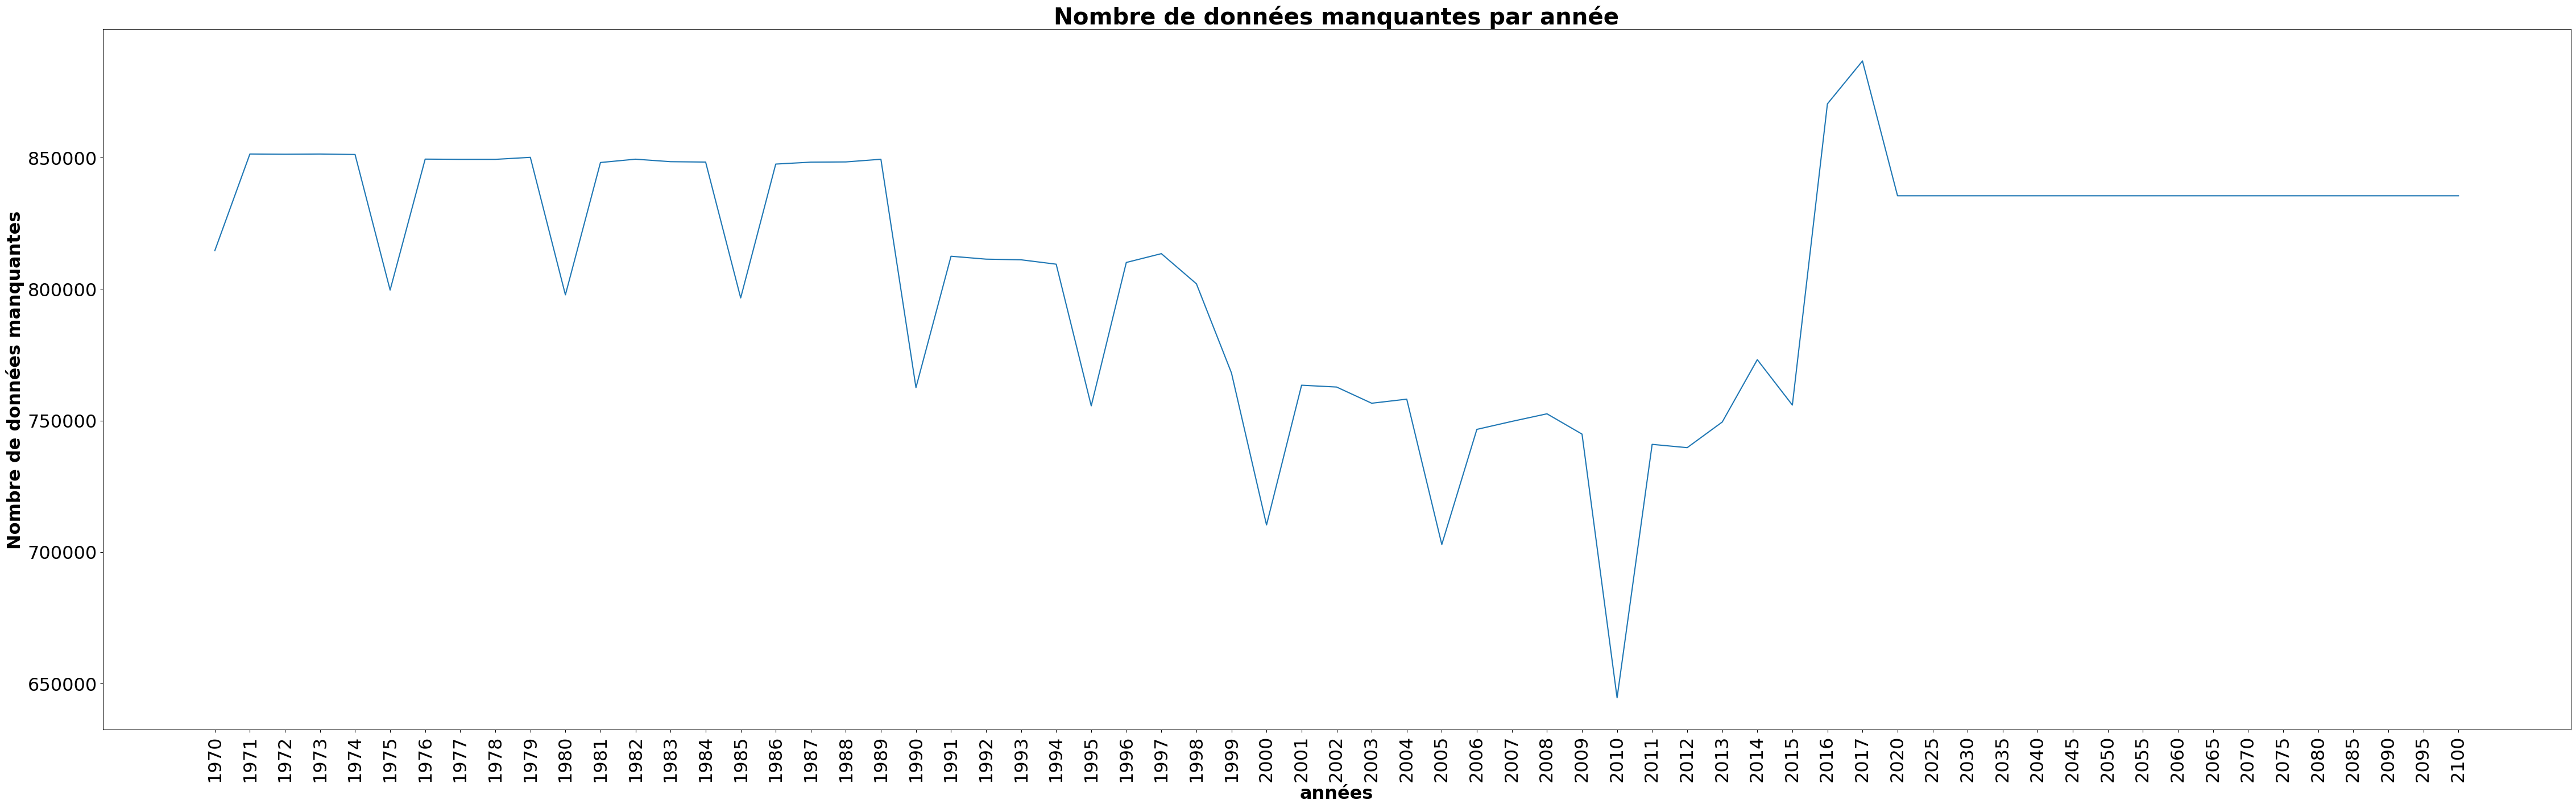

In [1381]:
plt.figure(figsize=(56, 16)) #pour agrandir notre figure
plt.plot(Individus_na2.index, Individus_na2.iloc[:,0]) #On trace la courbe
plt.xticks(rotation=90, fontsize=23) #On fait une rotation sur l'axe des abscisses, et on agrandi en taille 23
plt.yticks(fontsize=23) #On agrandi en taille 23 sur l'axe des ordonnées
plt.xlabel("années", fontsize=23, fontweight='bold') #On donne un nom à l'axe des abscisses
plt.ylabel("Nombre de données manquantes", fontsize=23, fontweight='bold') #On donne un nom à l'axe des ordonnées
plt.title("Nombre de données manquantes par année", fontsize=29, fontweight='bold') #On donne un titre à la figure
plt.show() #On affiche notre courbe

- Nous-nous apercevons qu'il y'a moins de données manquantes sur la période 2000 - 2015
- Nous allons donc sélectionner notre échantillon dans cette zone pour maximiser la quantité de données disponibles 
- Pour maintenir une cohérence analytique et observer l'évolution progressive, nous retiendrons un intervalle de 5 années consécutives
- Notre analyse portera ainsi sur la fenêtre 2008-2012

In [1382]:
EdStatsData = EdStatsData[['Country Name','Country Code', 'Indicator Name', 'Indicator Code', '2008', '2009', '2010', '2011', '2012']]
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,84.011871,84.195961,85.211998,85.24514,86.101669


**d) EdStatsFootNote**

Description du csv:

Ce fichier donne une série de codes par pays et fournit également une description ainsi qu'une liste d'années dont nous allons vérifier le contenu pour évaluer l'importance

In [1383]:
EdStatsFootNote.head()
EdStatsFootNote['Unnamed: 4'].unique() #Pour vérifier le contenu de la colonne
del EdStatsFootNote['Unnamed: 4'] #Pour supprimer cette colonne

EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [1384]:
#Vérifions le contenu de la colonne 'DESCRIPTION'
EdStatsFootNote['DESCRIPTION'].unique()[:100]

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate',
       '5-year average value between 0s and 5s',
       'Percentage includes lower secondary education.', 'Country data',
       'Country Data', 'UNSD WPP08 revision file 2A and 3A.',
       'Not applicable',
       'Percentage includes all tertiary levels (ISCED 5-8)', 'Estimated',
       'UIS estimation.', '<0.1. Plausible bound is <0.1-0.1',
       'Uncertainty bound is 127.1 - 148.2',
       'Uncertainty bound is 146.6 - 173.2',
       'Uncertainty bound is 134.1 - 157.1',
       'Uncertainty bound is 207.2 - 261.6',
       'Uncertainty bound is 60.2 - 86.1',
       'Uncertainty bound is 184.5 - 227.9',
       'Uncertainty bound is 167.8 - 201.7',
       'Uncertainty bound is 130.4 - 152.5',
       'Uncertainty bound is 240.3 - 308.5', 'Country estimation',
       'Uncertainty bound is 212.6 - 269.3',
       'Uncertainty bound is 201.4 - 253.3',
       'Uncertainty bound is 190.

In [1385]:
EdStatsFootNote['DESCRIPTION'].value_counts()

DESCRIPTION
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 45.3 - 54.9                       1
Uncertainty bound is 61.8 - 81.7                       1
Uncertainty bound is 61.4 - 80.7                       1
Uncertainty bound is 27.3 - 48.2                       1
Uncertainty bound is 48.3 - 73.3                       1
Name: count, Length: 9102, dtype: int64

In [1386]:
EdStatsFootNote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

>Les données de "DESCRIPTION" et "Year" ne semblent pas indispensables pour notre étude, nous allons donc mettre de côté ces colonnes pour le moment

In [1387]:
EdStatsFootNote = EdStatsFootNote[['CountryCode',	'SeriesCode']]

EdStatsFootNote.head()

,CountryCode,SeriesCode
0,ABW,SE.PRE.ENRL.FE
1,ABW,SE.TER.TCHR.FE
2,ABW,SE.PRE.TCHR.FE
3,ABW,SE.SEC.ENRL.GC
4,ABW,SE.PRE.TCHR


**e) EdStatsSeries**

Description du csv:

Ce fichier établit un lien entre les indicateurs, leurs sources et les données statistiques recueillies, ainsi que plusieurs autres informations dont nous allons vérifier le contenu. Nous verrons que plusieurs colonnes sont entièrement vides.

In [1388]:
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1389]:
EdStatsSeries['License Type'].unique() #Que des cases vides, à éliminer

array([nan])

In [1390]:
EdStatsSeries['Unit of measure'].unique() #Que des cases vides, à éliminer

array([nan])

>"Short definition" et "Long defintion" expliquent la même chose, et donnent juste les détails de ce qu'est "Indicator Name", donc on doit garder un seul pour le moment

In [1391]:
EdStatsSeries['Indicator Name'].isnull().sum() #On vérifie d'abord le nombre de case vide de Indicator Name avant de supprimer, si case vide, on voit dans l'un des 2 autres pour remplacer

0

> Pas de données manquantes dans 'Indicator Name, on pourra donc supprimer 'Short definition' et 'Long Definition

> Après vérification, voici les colonnes à supprimer

In [1392]:

EdStatsSeries = EdStatsSeries.drop(columns = ['Unit of measure','Periodicity','Other notes','Aggregation method','Short definition','Long definition','Limitations and exceptions','Base Period','Notes from original source','Source','Statistical concept and methodology','Development relevance','Related source links','Other web links','Related indicators','License Type','General comments','Unnamed: 20'])
EdStatsSeries.head()

,Series Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...


Colonnes retenues: 
- Series Code nous permettra de faire la jointure avec les autres fichiers
- Topic regroupe par sujet les différents indicateurs 
- Indicator Name liste les indicateurs chiffrés sur le fichier EdStatsData

**B- APRES CE PREMIER NETTOYAGE CERTAINS FICHIERS SEMBLENT INUTILES**

**- Vérifions leurs contenus**

In [1393]:
EdStatsCountry.head() #Fichier ok, contient des infos indispensables pour la suite

,Country Code,Long Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Islamic State of Afghanistan,South Asia,Low income
2,AGO,People's Republic of Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Republic of Albania,Europe & Central Asia,Upper middle income
4,AND,Principality of Andorra,Europe & Central Asia,High income: nonOECD


In [1394]:
EdStatsCountry_Series.head() 

,CountryCode,SeriesCode
0,ABW,SP.POP.TOTL
1,ABW,SP.POP.GROW
2,AFG,SP.POP.GROW
3,AFG,NY.GDP.PCAP.PP.CD
4,AFG,SP.POP.TOTL


>On peut mettre ce fichier de côté car il n'apporte aucune information importante pour notre étude

In [1395]:
EdStatsData.head() #Fichier ok, contient des infos indispensables pour la suite

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,84.011871,84.195961,85.211998,85.24514,86.101669


In [1396]:
EdStatsFootNote.head() 

,CountryCode,SeriesCode
0,ABW,SE.PRE.ENRL.FE
1,ABW,SE.TER.TCHR.FE
2,ABW,SE.PRE.TCHR.FE
3,ABW,SE.SEC.ENRL.GC
4,ABW,SE.PRE.TCHR


>On peut mettre ce fichier de côté car il n'apporte aucune information importante pour notre étude

In [1397]:
EdStatsSeries.head()

,Series Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...


In [1398]:
EdStatsSeries['Topic'].unique() #Pour vérifier le contenu de 'Topic'

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

>Ce contenu pourra nous aider dans la suite de notre étude 

Nous retenons donc les 3 fichiers : 
 
 - EdStatsCountry 
 - EdStatsData 
 - EdStatsSeries

**- Regroupons les fichiers retenus en un seul dataframe appelé "All_Data"**

In [1399]:
Data_Series = pd.merge(EdStatsData, EdStatsSeries, left_on = 'Indicator Code', right_on= 'Series Code', how='outer') #On joint d'abord EdStatsData et EdStatsSeries
All_Data = pd.merge(EdStatsCountry, Data_Series, on = 'Country Code') #On joint le df obtenu à EdStatsCountry
All_Data.head()

,Country Code,Long Name,Region,Income Group,Country Name,Indicator Name_x,Indicator Code,2008,2009,2010,2011,2012,Series Code,Topic,Indicator Name_y
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,60.643719,62.808041,NaN,78.047157,NaN,UIS.NERA.2,Secondary,"Adjusted net enrolment rate, lower secondary, ..."
1,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,65.938301,68.178833,NaN,82.111633,NaN,UIS.NERA.2.F,Secondary,"Adjusted net enrolment rate, lower secondary, ..."
2,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1.189450,1.184040,NaN,1.108400,NaN,UIS.NERA.2.GPI,Secondary,"Adjusted net enrolment rate, lower secondary, ..."
3,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,55.436161,57.581570,NaN,74.081360,NaN,UIS.NERA.2.M,Secondary,"Adjusted net enrolment rate, lower secondary, ..."
4,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,99.114319,95.995422,98.920464,NaN,NaN,SE.PRM.TENR,Primary,"Adjusted net enrolment rate, primary, both sex..."


**- Maitenant on élimine les colonnes inutiles et/ou doublées pour rendre le df plus clair**

In [1400]:
All_Data['Indicator Name_x'].value_counts()

Indicator Name_x
Adjusted net enrolment rate, lower secondary, both sexes (%)                                       241
Population, ages 10-18, female                                                                     241
Population, ages 10-18, total                                                                      241
Population, ages 11-15, female                                                                     241
Population, ages 11-15, male                                                                       241
                                                                                                  ... 
Expenditure on education not allocated by level as % of government expenditure on education (%)    241
Expenditure on lower secondary as % of government expenditure on education (%)                     241
Expenditure on lower secondary as % of total government expenditure (%)                            241
Expenditure on post-secondary non-tertiary as % of gover

In [1401]:
All_Data.columns #Pour visualiser les colonnes dans un Array

Index(['Country Code', 'Long Name', 'Region', 'Income Group', 'Country Name',
       'Indicator Name_x', 'Indicator Code', '2008', '2009', '2010', '2011',
       '2012', 'Series Code', 'Topic', 'Indicator Name_y'],
      dtype='object')

In [1402]:
All_Data = All_Data[['Country Name', 'Region', 'Income Group','Indicator Name_x','Topic','2008', '2009', '2010', '2011',
       '2012']] #On sélectionne uniquement les colonnes indispensables 

All_Data

,Country Name,Region,Income Group,Indicator Name_x,Topic,2008,2009,2010,2011,2012
0,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,60.643719,62.808041,NaN,78.047157,NaN
1,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,65.938301,68.178833,NaN,82.111633,NaN
2,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,1.189450,1.184040,NaN,1.108400,NaN
3,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,55.436161,57.581570,NaN,74.081360,NaN
4,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, primary, both sex...",Primary,99.114319,95.995422,98.920464,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
883260,Zimbabwe,Sub-Saharan Africa,Low income,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN,166679.000000,NaN
883261,Zimbabwe,Sub-Saharan Africa,Low income,"Youth literacy rate, population 15-24 years, b...",Literacy,NaN,NaN,NaN,90.930700,NaN
883262,Zimbabwe,Sub-Saharan Africa,Low income,"Youth literacy rate, population 15-24 years, f...",Literacy,NaN,NaN,NaN,92.124560,NaN
883263,Zimbabwe,Sub-Saharan Africa,Low income,"Youth literacy rate, population 15-24 years, g...",Literacy,NaN,NaN,NaN,1.028280,NaN


In [1403]:
All_Data.shape #Pour avoir une vue sur les dimensions de ce dernier df

(883265, 10)

In [1404]:
len(All_Data['Country Name'].unique()) #Pour connaitre le nombre d'individus

241

>En résumé nous avons pour la suite de notre étude un fichier de 883265 lignes et 10 colonnes, avec un total de 241 pays provisoirement.

#### 2- Nettoyage des lignes 
>Avant de commencer le nettoyage des lignes de notre df final, commençons par vérifier si tout est ok pour le type de chaque colonne 

In [1405]:
All_Data.dtypes 

Country Name         object
Region               object
Income Group         object
Indicator Name_x     object
Topic                object
2008                float64
2009                float64
2010                float64
2011                float64
2012                float64
dtype: object

> Tout est en ordre, chaque colonne correspond bien au type de ses éléments, procédons au nettoyage des lignes

**a) Commençons par éliminer les lignes qui ne donnent aucune information statistique sur l'ensemble des années sélectionnées**

In [1406]:
All_Data.loc[All_Data[['2008', '2009', '2010', '2011', '2012']].isna().all(axis=1), :] #On sélectionne les lignes en question

All_Data = All_Data.loc[~All_Data[['2008', '2009', '2010', '2011', '2012']].isna().all(axis=1), :] #On supprime 

All_Data.head()

,Country Name,Region,Income Group,Indicator Name_x,Topic,2008,2009,2010,2011,2012
0,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,60.643719,62.808041,NaN,78.047157,NaN
1,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,65.938301,68.178833,NaN,82.111633,NaN
2,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,1.189450,1.184040,NaN,1.108400,NaN
3,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",Secondary,55.436161,57.581570,NaN,74.081360,NaN
4,Aruba,Latin America & Caribbean,High income: nonOECD,"Adjusted net enrolment rate, primary, both sex...",Primary,99.114319,95.995422,98.920464,NaN,NaN


In [1407]:
All_Data['Indicator Name_x'].value_counts().sort_values(ascending=False)[0:25]

Indicator Name_x
Population growth (annual %)                                                                                   240
Population, total                                                                                              240
Internet users (per 100 people)                                                                                229
GDP per capita (current US$)                                                                                   228
GDP at market prices (current US$)                                                                             228
GDP per capita (constant 2005 US$)                                                                             227
GDP at market prices (constant 2005 US$)                                                                       227
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)    222
Population of the official age for upper secondary education, b

**b) Ensuite, on supprime les pays ayant une faible population, faible potentiel car petits marchés**

**- Sélectionnons les pays ayant une population au moins égale à 1 million d'habitants:**

In [1408]:
Data_popu= All_Data.loc[All_Data['Indicator Name_x']=='Population, total', ['Country Name', '2008', '2009', '2010', '2011', '2012']]
Data_popu['Moy_popu_2008_2012'] = (Data_popu['2008'] + Data_popu['2009'] + Data_popu['2010'] + Data_popu['2011'] + Data_popu['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années
Data_popu= Data_popu.loc[Data_popu['Moy_popu_2008_2012']>=1000000].sort_values(['Moy_popu_2008_2012']) #On trie par ordre croissant les pays ayant une moyenne de population supérieure ou égale à 1 million d'habitants
Data_popu = Data_popu[['Country Name', 'Moy_popu_2008_2012']] #On retire les années et on garde la moyenne uniquement
Data_popu.head()

,Country Name,Moy_popu_2008_2012
182118,Cyprus,1110428.6
794173,Timor-Leste,1113601.0
757523,Swaziland,1203166.2
75833,Bahrain,1223793.4
566943,Mauritius,1250047.2


**- On joint avec le df d'origine pour avoir une mise à jour des pays sélectionnés**

In [1409]:
All_Data = pd.merge(All_Data, Data_popu, on = 'Country Name', how = 'inner') #On joint les deux df pour avoir uniquement les pays ayant une population d'au moins 1 million d'habitants en moyenne sur les 5 ans
All_Data.head()

,Country Name,Region,Income Group,Indicator Name_x,Topic,2008,2009,2010,2011,2012,Moy_popu_2008_2012
0,Afghanistan,South Asia,Low income,"Adult illiterate population, 15+ years, % female",NaN,NaN,NaN,NaN,5.867976e+01,NaN,28901417.2
1,Afghanistan,South Asia,Low income,"Adult illiterate population, 15+ years, both s...",NaN,NaN,NaN,NaN,1.037256e+07,NaN,28901417.2
2,Afghanistan,South Asia,Low income,"Adult illiterate population, 15+ years, female...",NaN,NaN,NaN,NaN,6.086596e+06,NaN,28901417.2
3,Afghanistan,South Asia,Low income,"Adult illiterate population, 15+ years, male (...",Literacy,NaN,NaN,NaN,4.285969e+06,NaN,28901417.2
4,Afghanistan,South Asia,Low income,"Adult literacy rate, population 15+ years, bot...",Literacy,NaN,NaN,NaN,3.174112e+01,NaN,28901417.2


In [1410]:
del All_Data['Moy_popu_2008_2012'] #On supprime la colonne de la moyenne de la population précédement créée

In [1411]:
len(All_Data['Country Name'].unique()) #Pour connaitre le nombre actuel d'individus 

182

In [1412]:
All_Data.shape

(258444, 10)

>Après ce filtre, il nous reste donc 182 pays pour 258444 lignes et 10 colonnes

**c) Réduisons également les pays ayant un faibe taux d'utilisation d'internet car sans internet aucun interêt de proposer nos formations en ligne**

**On va partir sur les pays où le taux d'utilisateurs d'internet est d'au moins 25%**

In [1413]:
Data_Internet= All_Data.loc[All_Data['Indicator Name_x']=='Internet users (per 100 people)', ['Country Name','2008', '2009', '2010', '2011', '2012']] #On sélectionne les pays selon le taux d'utilisateurs d'internet par année
Data_Internet['Moy_Acc_Internet(%)'] = (Data_Internet['2008'] + Data_Internet['2009'] + Data_Internet['2010'] + Data_Internet['2011'] + Data_Internet['2012'])/5 #On trouve le pourçantage moyen d'utilisateurs d'internet par pays sur les 5 années
Data_Internet= Data_Internet.loc[Data_Internet['Moy_Acc_Internet(%)']>=25].sort_values(['Moy_Acc_Internet(%)']) #On trie par ordre croissant les pays où le taux d'utilisateurs moyen d'internet sur les 5 ans est supérieur ou égale à 25% 
Data_Internet= Data_Internet[['Country Name', 'Moy_Acc_Internet(%)']] #On retire les années et on garde la moyenne uniquement
Data_Internet.head()

,Country Name,Moy_Acc_Internet(%)
82111,Georgia,25.088000
3887,Arab World,26.407291
66570,Ecuador,27.786391
64651,East Asia & Pacific (excluding high income),28.088213
160434,Mauritius,28.604000


**- On joint avec df d'origine pour se limiter aux pays ayant au moins 25% d'utilisateurs d'internet**

In [1414]:
All_Data = pd.merge(All_Data, Data_Internet, on='Country Name', how= 'right' )
All_Data

,Country Name,Region,Income Group,Indicator Name_x,Topic,2008,2009,2010,2011,2012,Moy_Acc_Internet(%)
0,Georgia,Europe & Central Asia,Lower middle income,"Adjusted net enrolment rate, lower secondary, ...",Secondary,79.808167,82.567482,NaN,NaN,NaN,25.088000
1,Georgia,Europe & Central Asia,Lower middle income,"Adjusted net enrolment rate, lower secondary, ...",Secondary,77.541199,NaN,NaN,NaN,NaN,25.088000
2,Georgia,Europe & Central Asia,Lower middle income,"Adjusted net enrolment rate, lower secondary, ...",Secondary,0.945010,NaN,NaN,NaN,NaN,25.088000
3,Georgia,Europe & Central Asia,Lower middle income,"Adjusted net enrolment rate, lower secondary, ...",Secondary,82.053078,NaN,NaN,NaN,NaN,25.088000
4,Georgia,Europe & Central Asia,Lower middle income,"Adjusted net enrolment rate, primary, both sex...",Primary,99.593658,99.959793,NaN,99.355263,NaN,25.088000
...,...,...,...,...,...,...,...,...,...,...,...
135542,Norway,Europe & Central Asia,High income: OECD,Wittgenstein Projection: Population in thousan...,Attainment,NaN,NaN,37.95,NaN,NaN,92.835992
135543,Norway,Europe & Central Asia,High income: OECD,Wittgenstein Projection: Population in thousan...,Attainment,NaN,NaN,74.23,NaN,NaN,92.835992
135544,Norway,Europe & Central Asia,High income: OECD,Wittgenstein Projection: Population in thousan...,Attainment,NaN,NaN,788.54,NaN,NaN,92.835992
135545,Norway,Europe & Central Asia,High income: OECD,Wittgenstein Projection: Population in thousan...,Attainment,NaN,NaN,882.50,NaN,NaN,92.835992


In [1415]:
del All_Data ['Moy_Acc_Internet(%)'] #On supprime la colonne de la moyenne de la population précédement créée

In [1416]:
len(All_Data['Country Name'].unique())

92

In [1417]:
All_Data.shape

(135547, 10)

>Après ce filtre, il nous reste donc 92 pays pour 135547 lignes et 10 colonnes

**3- Choix des indicateurs indispensables pour notre étude**

**- Vérification des indicateurs**

In [1418]:
All_Data['Indicator Name_x'].unique() #Pour visualiser les élements de 'Indicator Name x'

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Repetition rate in Grade 7 of primary education, female (%)',
       'Repetition rate in Grade 7 of primary education, male (%)',
       'SABER: (School Autonomy Accountability) Policy Goal 1 Lever 3: Legal authority over the management of teacher salaries'],
      dtype=object)

In [1419]:
All_Data['Indicator Name_x'].unique()[:60] #Pour avoir une vue sur les 60 premiers élements

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, female (%)',
       'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, upper secondary, male (%)',
       'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
       'Adjusted net intake rate to Grade 1 of primary education, female (%)',
       'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
       'Adjusted net intake rate to Grade 1 of primary education, male (%)',
       'Cumulative drop-out rate t

>On s'apperçoit qu'il y'a beaucoup d'informations concernant l'école primaire et pre-primaire, 

>On va donc se servir du 'Topic' pour éliminer ces informations qui ne sont pas bénéfiques pour notre étude car ce n'est pas notre cible 

**- Suppression des 'Topic' liées aux informations sur les études primaires**

In [1420]:
All_Data['Topic'].unique() #Pour visualiser les éléments de 'Topic'

array(['Secondary', 'Primary', 'Background', nan, 'Tertiary',
       'Post-Secondary/Non-Tertiary', 'Early Childhood Education',
       'Expenditures',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Mortality', 'Teachers', 'Learning Outcomes',
       'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors',
       'Attainment', 'Social Protection & Labor: Unemployment',
       'Literacy', 'EMIS', 'Early Child Development (SABER)',
       'School Finance (SABER)', 'Teachers (SABER)', 'Education Equality',
       'Laber', 

In [1421]:
No_Need_Topic = ['Primary', 'Early Childhood Education', 
             'Pre-Primary', 'Early Child Development (SABER)'] #On intrdoduit dans une liste les éléments dont nous n'avons pas besoin
All_Data = All_Data.loc[~All_Data['Topic'].isin(No_Need_Topic), :] #On les supprime 
All_Data['Indicator Name_x'].unique()[:60] #On vérifie à nouveau les 60 Premiers éléments des indicateurs 

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, female (%)',
       'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, upper secondary, male (%)',
       'Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)',
       'Cumulative drop-out rate to the last grade of lower secondary general education, female (%)',
       'Cumulative drop-out rate to the last grade of lower secondary general education, male (%)',
       'Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)',
       'Drop-out rate from Grade

**- Ensuite on fait le tri des indicateurs restants**

In [1422]:
All_Data['Indicator Name_x'].value_counts() #Pour avoir une vue sur le nombre d'utilisation de chaque indicateur
All_Data['Indicator Name_x'].value_counts().sort_values(ascending=False) #On trie les indicateurs par ordre des plus utilisés aux moins utilisés

Indicator Name_x
GDP at market prices (constant 2005 US$)                                                                               92
Unemployment, total (% of total labor force)                                                                           92
GDP at market prices (current US$)                                                                                     92
Percentage of students in lower secondary education who are female (%)                                                 92
GDP per capita (current US$)                                                                                           92
                                                                                                                       ..
Africa Dataset: Percentage of newly recruited teachers in lower secondary education who are trained, both sexes (%)     1
Africa Dataset: Percentage of newly recruited teachers in upper secondary education who are trained, both sexes (%)     1
EGRA: C

>On s'apperçoit qu'il y'a plusieurs indicateurs qui sont utilisés très peu de fois, on va devoir se limiter aux indicateurs les plus utilisés

**- Ciblage des indicateurs les plus utilisés**

In [1423]:
len(All_Data['Indicator Name_x'].value_counts().sort_values(ascending=False)) #Pour vérifier le nombre d'indicateurs total

2524

>On a donc 92 individus, partons sur des indicateurs qui sont présent sur au moins 80% des individus, pour avoir le plus de données possibles,

>On va donc se limiter à 80% de 92 c'est à dire 73, les indicateurs qui donnent des informations sur au moins 73 pays.  

In [1424]:
Indicator_73 = All_Data['Indicator Name_x'].value_counts().sort_values(ascending=False)
Indicator_73 = Indicator_73 [Indicator_73 >= 73 ]
len(Indicator_73) 


695

>On va maintenant naviguer par intervalle de 25 éléments pour découvrir les différents indicateurs et sélectionner les plus pertinents en les nottant progressivement dans une liste 'Selected_Indicators'

In [1425]:
Indicator_73[:25] #On navigue par tranche de 25 élements 
Indicator_73[25:50] #Ainsi de suite... Et on sélectionne progressivement les indicateurs indispensables 
Indicator_73[325:350]


Indicator Name_x
Wittgenstein Projection: Mean years of schooling. Age 25-29. Male                                                                      78
Wittgenstein Projection: Mean years of schooling. Age 25-29. Total                                                                     78
Wittgenstein Projection: Mean years of schooling. Age 20-24. Male                                                                      78
Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Female    78
Wittgenstein Projection: Mean years of schooling. Age 65+. Total                                                                       78
Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total     78
Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total     78
Wittgenstein Proj

>**Les indicateurs sélectionnés** 

In [1426]:
Selected_Indicator = ['Population, total', 'Internet users (per 100 people)', 
                      'Unemployment, total (% of total labor force)',
                      'Labor force, total','GDP per capita (current US$)',
                      'Population of the official entrance age to secondary general education, both sexes (number)',   
                      'Population of the official age for tertiary education, both sexes (number)', 
                      'GNI per capita, PPP (current international $)', 'Enrolment in tertiary education, all programmes, both sexes (number)',
                      'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
                      'Population, ages 15-24, total']


**- A présent on peut mettre à jour notre df principal avec tous les indicateurs sélectionnés**

In [1427]:
All_Data = All_Data.loc[All_Data['Indicator Name_x'].isin(Selected_Indicator), :]
All_Data

,Country Name,Region,Income Group,Indicator Name_x,Topic,2008,2009,2010,2011,2012
101,Georgia,Europe & Central Asia,Lower middle income,"Enrolment in tertiary education, all programme...",Tertiary,1.299260e+05,9.522500e+04,1.056960e+05,1.105570e+05,9.937600e+04
136,Georgia,Europe & Central Asia,Lower middle income,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$...,3.174949e+03,2.706589e+03,2.964477e+03,3.725063e+03,4.142869e+03
143,Georgia,Europe & Central Asia,Lower middle income,"GNI per capita, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,6.070000e+03,5.990000e+03,6.390000e+03,7.100000e+03,7.950000e+03
252,Georgia,Europe & Central Asia,Lower middle income,Internet users (per 100 people),Infrastructure: Communications,1.001000e+01,2.007000e+01,2.690000e+01,3.152000e+01,3.694000e+01
254,Georgia,Europe & Central Asia,Lower middle income,"Labor force, total",Social Protection & Labor: Labor force structure,2.091483e+06,2.074262e+06,2.087197e+06,2.093600e+06,2.103224e+06
...,...,...,...,...,...,...,...,...,...,...
134798,Norway,Europe & Central Asia,High income: OECD,Population of the official age for tertiary ed...,Population,2.940010e+05,3.015990e+05,3.082940e+05,3.143470e+05,3.252140e+05
134810,Norway,Europe & Central Asia,High income: OECD,Population of the official entrance age to sec...,Population,6.371000e+04,6.368400e+04,6.370600e+04,6.381300e+04,6.367300e+04
134954,Norway,Europe & Central Asia,High income: OECD,"Population, ages 15-24, total",Population,6.052510e+05,6.162590e+05,6.258490e+05,6.337390e+05,6.398790e+05
135005,Norway,Europe & Central Asia,High income: OECD,"Population, total",Health: Population: Structure,4.768212e+06,4.828726e+06,4.889252e+06,4.953088e+06,5.018573e+06


> A présent avec les indicateurs sélectionnés, nous n'avons plus besoin des 'Topic', nous pourons nous baser uniquement sur les indicateurs sélectionnés pour la suite de notre étude

In [1428]:
del All_Data['Topic']

In [1429]:
All_Data.head()

,Country Name,Region,Income Group,Indicator Name_x,2008,2009,2010,2011,2012
101,Georgia,Europe & Central Asia,Lower middle income,"Enrolment in tertiary education, all programme...",1.299260e+05,9.522500e+04,1.056960e+05,1.105570e+05,9.937600e+04
136,Georgia,Europe & Central Asia,Lower middle income,GDP per capita (current US$),3.174949e+03,2.706589e+03,2.964477e+03,3.725063e+03,4.142869e+03
143,Georgia,Europe & Central Asia,Lower middle income,"GNI per capita, PPP (current international $)",6.070000e+03,5.990000e+03,6.390000e+03,7.100000e+03,7.950000e+03
252,Georgia,Europe & Central Asia,Lower middle income,Internet users (per 100 people),1.001000e+01,2.007000e+01,2.690000e+01,3.152000e+01,3.694000e+01
254,Georgia,Europe & Central Asia,Lower middle income,"Labor force, total",2.091483e+06,2.074262e+06,2.087197e+06,2.093600e+06,2.103224e+06


In [1430]:
All_Data.shape #Pour vérifier les nouvelles dimensions de notre df

(977, 9)

In [1431]:
len (All_Data['Country Name'].unique())

92

>Après ce filtre, il nous reste donc 92 pays pour 885 lignes et 9 colonnes

**4- Remplissage des valeurs manquantes**

**- On vérifie le nombre de valeurs manquantes**

In [1432]:
All_Data.isna().sum() #On vérifie le nombre de valeurs manquantes

Country Name          0
Region              140
Income Group        140
Indicator Name_x      0
2008                 16
2009                 15
2010                 17
2011                 15
2012                 12
dtype: int64

**- On va commencer par compléter les valeurs manquantes des années 2008 à 2012**

In [1433]:
All_Data['Indicator Name_x'].unique() #On affiche les différents indicateurs 

array(['Enrolment in tertiary education, all programmes, both sexes (number)',
       'GDP per capita (current US$)',
       'GNI per capita, PPP (current international $)',
       'Internet users (per 100 people)', 'Labor force, total',
       'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
       'Population of the official age for tertiary education, both sexes (number)',
       'Population of the official entrance age to secondary general education, both sexes (number)',
       'Population, ages 15-24, total', 'Population, total',
       'Unemployment, total (% of total labor force)'], dtype=object)

**- On va utiliser la médiane pour compléter ces valeurs**

In [1434]:
#Détermination de la médiane sur l'axe 1 pour chaque indicateur : 
All_Data.loc[(All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)') & #On sélectionne la ligne et colonne pour laquelle on a une valeur nulle 
             (All_Data['2008'].isna()), '2008'] = All_Data.loc[All_Data['Indicator Name_x']==
                                                               'Enrolment in tertiary education, all programmes, both sexes (number)', #On la remplace par la médianne des valeurs sur l'axe 1 (valeurs des différentes années)
                                                               ['2008', '2009', '2010', '2011', '2012']].median(axis=1)

All_Data.loc[(All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)') & #On fait de même pour l'année suivante 
             (All_Data['2009'].isna()), '2009'] = All_Data.loc[All_Data['Indicator Name_x']==
                                                               'Enrolment in tertiary education, all programmes, both sexes (number)', 
                                                               ['2008', '2009', '2010', '2011', '2012']].median(axis=1)

All_Data.loc[(All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)') & 
             (All_Data['2010'].isna()), '2010'] = All_Data.loc[All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)', 
                                                               ['2008', '2009', '2010', '2011', '2012']].median(axis=1)

All_Data.loc[(All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)') & 
             (All_Data['2011'].isna()), '2011'] = All_Data.loc[All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)', 
                                                               ['2008', '2009', '2010', '2011', '2012']].median(axis=1)

All_Data.loc[(All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)') & 
             (All_Data['2012'].isna()), '2012'] = All_Data.loc[All_Data['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)', 
                                                               ['2008', '2009', '2010', '2011', '2012']].median(axis=1)

>Il suffit donc de faire une boucle pour chaque indicateur 

In [1435]:
 #'GDP per capita (current US$)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'GDP per capita (current US$)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1436]:
#'GNI per capita, PPP (current international $)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'GNI per capita, PPP (current international $)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1437]:
# 'Internet users (per 100 people)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Internet users (per 100 people)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1438]:
# 'Labor force, total'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Labor force, total'
for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1439]:
#'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)'
for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1440]:
#'Population of the official age for tertiary education, both sexes (number)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Population of the official age for tertiary education, both sexes (number)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1441]:
#'Population of the official entrance age to secondary general education, both sexes (number)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Population of the official entrance age to secondary general education, both sexes (number)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1442]:
#Population, ages 15-24, total'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Population, ages 15-24, total'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1443]:
#'Population, total'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Population, total'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

In [1444]:
#'Unemployment, total (% of total labor force)'
cols = ['2008', '2009', '2010', '2011', '2012']
mask = All_Data['Indicator Name_x'] == 'Unemployment, total (% of total labor force)'

for col in cols:
    missing_rows = mask & All_Data[col].isna()
    All_Data.loc[missing_rows, col] = All_Data.loc[missing_rows, cols].median(axis=1)

>On vérifie si les valeurs manquantes des années ont été complétées

In [1445]:
All_Data.isna().sum()

Country Name          0
Region              140
Income Group        140
Indicator Name_x      0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
dtype: int64

**- Complétons les valeurs manquantes de la colonne 'Region'**

In [1446]:
Na_Region = All_Data.loc[All_Data['Region'].isna(), ['Country Name','Region']]
len (Na_Region['Country Name'].unique())

14

In [1447]:
Na_Region['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific (excluding high income)',
       'World', 'Upper middle income', 'East Asia & Pacific',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'OECD members', 'European Union',
       'Euro area', 'High income', 'North America'], dtype=object)

>Avant de compléter ces valeurs, nous nous apperçevons que les informations de cette liste concerne des zones géographiques et non des pays, or notre colonne concerne les pays, 
>Pour ne pas fausser les résutats, nous allons donc retirer ces zones géographiques de notre df principal et créer un autre df à côté pour elles


In [1448]:
Zone = ['Arab World', 'East Asia & Pacific (excluding high income)',
       'World', 'Upper middle income', 'East Asia & Pacific',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'OECD members', 'European Union',
       'Euro area', 'High income', 'North America']

In [1449]:
All_Data_Country = All_Data.loc[~All_Data['Country Name'].isin(Zone), : ]
All_Data_Zone = All_Data.loc[All_Data['Country Name'].isin(Zone), : ]

In [1450]:
len(All_Data_Country['Country Name'].unique())

78

In [1451]:
len(All_Data_Zone['Country Name'].unique())

14

>Ainsi pour la suite, les données correspondantes aux pays sera 'All_Data_Country' avec 78 Pays et pour les zones sera 'All_Data_Zone' avec 14 zones

>Complétons donc les cases vides correpondantes 

In [1452]:
All_Data_Country.isna().sum()

Country Name        0
Region              0
Income Group        0
Indicator Name_x    0
2008                0
2009                0
2010                0
2011                0
2012                0
dtype: int64

In [1453]:
All_Data_Zone.isna().sum()

Country Name          0
Region              140
Income Group        140
Indicator Name_x      0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
dtype: int64

>Toutes les cases vides sont dans le df des zones

>Puisqu'il s'agit des zones, nous ne pouvons donc pas rajouter de région car une zone n'est pas forcement localisée dans une région

>Par exp 'Arab World' le monde arabe est situé dans plusieurs régions: moyen orient, Afrique du Nord, Afrique de l'Est 

>De même nous allons retirer la colone 'Income Group' dans ce df car le niveau de revenu peu varier selon les pays qui constituent la zone choisie

In [1454]:
All_Data_Zone = All_Data_Zone[['Country Name', 'Indicator Name_x', '2008',	'2009',	'2010',	'2011',	'2012']]
All_Data_Zone.rename(columns={"Country Name": "Zone Name"}, inplace=True)

All_Data_Zone.head()

,Zone Name,Indicator Name_x,2008,2009,2010,2011,2012
1520,Arab World,"Enrolment in tertiary education, all programme...",8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06
1539,Arab World,GDP per capita (current US$),6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03
1546,Arab World,"GNI per capita, PPP (current international $)",1.382449e+04,1.385250e+04,1.428402e+04,1.499616e+04,1.584650e+04
1592,Arab World,Internet users (per 100 people),1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01
1594,Arab World,"Labor force, total",1.078529e+08,1.112134e+08,1.148532e+08,1.183331e+08,1.217115e+08


In [1455]:
All_Data_Country.isna().sum()

Country Name        0
Region              0
Income Group        0
Indicator Name_x    0
2008                0
2009                0
2010                0
2011                0
2012                0
dtype: int64

************************************
------------------------------------

## ETAPE 3 : CREATION DES DATAFRAMES

**1- Regroupement par moyenne des indicateurs**

>En réalité, nous pouvons regrouper toutes les données sur un tableau avec le pivot table mais il reste assez complexe et difficile à exploiter

In [1456]:
All_Data.pivot_table(index=['Country Name'], columns= 'Indicator Name_x', values=['2008','2009','2010',	'2011',	'2012']).head()

2008  \
Indicator Name_x Enrolment in tertiary education, all programmes, both sexes (number)   
Country Name                                                                            
Albania                                                     90606.0                     
Arab World                                                8006891.5                     
Argentina                                                 2287874.0                     
Australia                                                 1117804.0                     
Austria                                                    284791.0                     

                                               \
Indicator Name_x GDP per capita (current US$)   
Country Name                                    
Albania                           4370.539647   
Arab World                        6255.761156   
Argentina                         8953.359275   
Australia                        49664.685043   
Austria                          51708.765754   

                                                                \
Indicator Name_x GNI per capita, PPP (current international $)   
Country Name                                                     
Albania                                            8270.000000   
Arab World                                        13824.485684   
Argentina                                         17270.000000   
Australia                                         35980.000000   
Austria                                           41660.000000   

                                                                     \
Indicator Name_x Internet users (per 100 people) Labor force, total   
Country Name                                                          
Albania                                23.860000          1234727.0   
Arab World                             18.593531        107852889.0   
Argentina                              28.112623         18118659.0   
Australia                              71.670000         11259228.0   
Austria                                72.870000          4209469.0   

                                                                                                                  \
Indicator Name_x Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)   
Country Name                                                                                                       
Albania                                                    7.293510                                                
Arab World                                                 9.619600                                                
Argentina                                                       NaN                                                
Australia                                                 31.986420                                                
Austria                                                   38.908421                                                

                                                                                             \
Indicator Name_x Population of the official age for tertiary education, both sexes (number)   
Country Name                                                                                  
Albania                                                    282457.0                           
Arab World                                               34162192.0                           
Argentina                                                 3357541.0                           
Australia                                                 1532949.0                           
Austria                                                    507197.0                           

                                                                                                              \
Indicator Name_x Population of the official entrance age to secondary gener

>Afin d'avoir une meilleure vue sur chaque indicateur, nous allons trouver une moyenne pour chacun d'eux sur les 5 années étudiées pour ensuite faire un regroupement par indicateur/pays

>Nous allons travailler sur le df des pays 

In [1457]:
Selected_Indicator = ['Population, total', 
                      'Internet users (per 100 people)', 
                      'Unemployment, total (% of total labor force) ',
                      'Labor force, total',
                      'GDP per capita (current US$)',
                      'Population of the official entrance age to secondary general education, both sexes (number)',   
                      'Population of the official age for tertiary education, both sexes (number)', 
                      'GNI per capita, PPP (current international $)', 
                      'Enrolment in tertiary education, all programmes, both sexes (number)',
                      'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
                      'Population, ages 15-24, total' ]

>On va ajouter cette moyenne dans une colonne qu'on va appeler Mean_Indicators

In [1458]:
#Calcul de la moyenne pour l'indicateur 'Population, total'

Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Population, total', 
                                ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']] #On sélectionne l'indicateur selon les années

Data_mask['Mean_Indicators'] = (All_Data_Country['2008'] + All_Data_Country['2009'] 
                                   + All_Data_Country['2010'] + All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On fait la moyenne sur les 5 années et on ajoute dans une colonne appelée 'Mean_Indicators' 

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Mean_Indicators']] #On sélectionne la colonne des moyennes 

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left') # Ensuite on joint au df des pays 

All_Data_Country.head()


,Country Name,Region,Income Group,Indicator Name_x,2008,2009,2010,2011,2012,Mean_Indicators
0,Georgia,Europe & Central Asia,Lower middle income,"Enrolment in tertiary education, all programme...",1.299260e+05,9.522500e+04,1.056960e+05,1.105570e+05,9.937600e+04,NaN
1,Georgia,Europe & Central Asia,Lower middle income,GDP per capita (current US$),3.174949e+03,2.706589e+03,2.964477e+03,3.725063e+03,4.142869e+03,NaN
2,Georgia,Europe & Central Asia,Lower middle income,"GNI per capita, PPP (current international $)",6.070000e+03,5.990000e+03,6.390000e+03,7.100000e+03,7.950000e+03,NaN
3,Georgia,Europe & Central Asia,Lower middle income,Internet users (per 100 people),1.001000e+01,2.007000e+01,2.690000e+01,3.152000e+01,3.694000e+01,NaN
4,Georgia,Europe & Central Asia,Lower middle income,"Labor force, total",2.091483e+06,2.074262e+06,2.087197e+06,2.093600e+06,2.103224e+06,NaN


>On voit qu'il y'a une nouvelle colonne appelée "Mean_Indicators", 

>Ici la moyenne de l'indicateur 'Population, total' est complétée sur toutes les lignes, mais les autres sont encore manquantes, raison pour laquelle on voit des NaN,

>On va les compléter progressivement 

In [1459]:
All_Data_Country.isna().sum() #On observe qu'il y'a encore plusieurs cases vide, on va compléter avec les autres calculs de moyenne

Country Name          0
Region                0
Income Group          0
Indicator Name_x      0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
Mean_Indicators     759
dtype: int64

In [1460]:
#'Internet users (per 100 people)'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Internet users (per 100 people)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Internet'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Internet']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Internet users (per 100 people)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                       == 'Internet users (per 100 people)', 'Moy_Internet']
del All_Data_Country['Moy_Internet'] #On supprime la colonne créée


In [1461]:
#'Unemployment, total (% of total labor force)'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Unemployment, total (% of total labor force)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_%Unempl'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_%Unempl']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Unemployment, total (% of total labor force)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                       == 'Unemployment, total (% of total labor force)', 'Moy_%Unempl']
del All_Data_Country['Moy_%Unempl'] #On supprime la colonne créée


In [1462]:
#Labor force, total'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Labor force, total', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Lab_For'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Lab_For']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Labor force, total', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                       == 'Labor force, total', 'Moy_Lab_For']
del All_Data_Country['Moy_Lab_For'] #On supprime la colonne créée



In [1463]:
#'GDP per capita (current US$)'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='GDP per capita (current US$)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_GDP'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_GDP']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'GDP per capita (current US$)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'GDP per capita (current US$)', 'Moy_GDP']

del All_Data_Country['Moy_GDP'] #On supprime la colonne créée



In [1464]:
#'Population of the official entrance age to secondary general education, both sexes (number)'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Population of the official entrance age to secondary general education, both sexes (number)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Popu'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Popu']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Population of the official entrance age to secondary general education, both sexes (number)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'Population of the official entrance age to secondary general education, both sexes (number)', 'Moy_Popu']
del All_Data_Country['Moy_Popu'] #On supprime la colonne créée


In [1465]:
#'Population of the official age for tertiary education, both sexes (number)', 
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Population of the official age for tertiary education, both sexes (number)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Popu_ter'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Popu_ter']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Population of the official age for tertiary education, both sexes (number)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'Population of the official age for tertiary education, both sexes (number)', 'Moy_Popu_ter']
del All_Data_Country['Moy_Popu_ter'] #On supprime la colonne créée


In [1466]:
#'GNI per capita, PPP (current international $)' 
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='GNI per capita, PPP (current international $)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_GNI'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_GNI']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'GNI per capita, PPP (current international $)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'GNI per capita, PPP (current international $)', 'Moy_GNI']
del All_Data_Country['Moy_GNI'] #On supprime la colonne créée


In [1467]:
#'Enrolment in tertiary education, all programmes, both sexes (number)' 
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Enrolment in tertiary education, all programmes, both sexes (number)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Enr_Ter'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Enr_Ter']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Enrolment in tertiary education, all programmes, both sexes (number)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'Enrolment in tertiary education, all programmes, both sexes (number)', 'Moy_Enr_Ter']
del All_Data_Country['Moy_Enr_Ter'] #On supprime la colonne créée


In [1468]:
#'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_Sec_Enr_voc'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_Sec_Enr_voc']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)', 'Moy_Sec_Enr_voc']
del All_Data_Country['Moy_Sec_Enr_voc'] #On supprime la colonne créée


In [1469]:
#'Population, ages 15-24, total'
Data_mask= All_Data_Country.loc[All_Data_Country['Indicator Name_x']=='Population, ages 15-24, total', 
                                 ['Country Name','Indicator Name_x','2008', '2009', '2010', '2011', '2012']]

Data_mask['Moy_pop1524'] = (All_Data_Country['2008'] + All_Data_Country['2009'] + All_Data_Country['2010'] + 
                              All_Data_Country['2011'] + All_Data_Country['2012'])/5 #On trouve la moyenne de la population par pays sur les 5 années

Data_mask = Data_mask[['Country Name', 'Indicator Name_x','Moy_pop1524']]

All_Data_Country = pd.merge(All_Data_Country, Data_mask, on= ['Country Name', 'Indicator Name_x'], how='left')

#Et on remplace les valeurs de la moyenne des indicateus par les nouvelles valeurs calculées
All_Data_Country.loc[All_Data_Country['Indicator Name_x'] == 'Population, ages 15-24, total', 'Mean_Indicators'] = All_Data_Country.loc[All_Data_Country['Indicator Name_x'] 
                                                                                                                                       == 'Population, ages 15-24, total', 'Moy_pop1524']
del All_Data_Country['Moy_pop1524'] #On supprime la colonne créée
All_Data_Country.isna().sum() #On vérifie le nombre de cases vides

Country Name        0
Region              0
Income Group        0
Indicator Name_x    0
2008                0
2009                0
2010                0
2011                0
2012                0
Mean_Indicators     0
dtype: int64

>On peut voir qu'il n'y a plus de case vide dans notre nouvelle colonne, toutes les moyennes sont complétées

In [1470]:
All_Data_Country.head()

,Country Name,Region,Income Group,Indicator Name_x,2008,2009,2010,2011,2012,Mean_Indicators
0,Georgia,Europe & Central Asia,Lower middle income,"Enrolment in tertiary education, all programme...",1.299260e+05,9.522500e+04,1.056960e+05,1.105570e+05,9.937600e+04,1.081560e+05
1,Georgia,Europe & Central Asia,Lower middle income,GDP per capita (current US$),3.174949e+03,2.706589e+03,2.964477e+03,3.725063e+03,4.142869e+03,3.342789e+03
2,Georgia,Europe & Central Asia,Lower middle income,"GNI per capita, PPP (current international $)",6.070000e+03,5.990000e+03,6.390000e+03,7.100000e+03,7.950000e+03,6.700000e+03
3,Georgia,Europe & Central Asia,Lower middle income,Internet users (per 100 people),1.001000e+01,2.007000e+01,2.690000e+01,3.152000e+01,3.694000e+01,2.508800e+01
4,Georgia,Europe & Central Asia,Lower middle income,"Labor force, total",2.091483e+06,2.074262e+06,2.087197e+06,2.093600e+06,2.103224e+06,2.089953e+06


> Avec ce df nous allons pouvoir créer un df à part qui rassemble les moyennes des indicateurs par pays et/ou région avec le pivot_table

**2 - Création des df par indicateur avec le pivot table**

**- Création du df des indicateurs par pays**

In [1471]:
Data_Indicator_byCountry = All_Data_Country.pivot_table(index='Country Name', columns='Indicator Name_x', values='Mean_Indicators')
Data_Indicator_byCountry.head()


Indicator Name_x,"Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Labor force, total","Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)","Population of the official age for tertiary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total","Population, total","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,
Albania,120357.4,4252.765480,9432.0,42.743192,1256809.8,5.955810,276424.8,52937.2,604622.2,2918690.0,13.68
Argentina,2516595.8,10617.508445,17856.0,42.782525,18537618.8,NaN,3407770.8,688643.2,6817939.0,41231860.6,7.70
Australia,1256519.4,54840.899913,38790.0,76.081540,11665055.0,33.112483,1571427.4,279530.4,2910566.2,22008185.6,5.06
Austria,336284.6,49294.528425,43230.0,76.051997,4280086.4,39.340570,510869.2,85716.6,1006689.2,8369971.4,4.74
Azerbaijan,181438.4,6210.746267,14162.0,38.936000,4457866.0,NaN,931346.2,132964.0,1786117.4,9046768.2,5.56


**- Création du df des indicateurs par régions**

In [1472]:
Data_Indicator_byRegion = All_Data_Country.pivot_table(index='Region', columns='Indicator Name_x', values='Mean_Indicators')
Data_Indicator_byRegion.head()

Indicator Name_x,"Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Labor force, total","Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)","Population of the official age for tertiary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total","Population, total","Unemployment, total (% of total labor force)"
Region,,,,,,,,,,,
East Asia & Pacific,4.705680e+06,27834.410800,31714.222222,64.425598,1.062747e+08,14.059310,1.883015e+07,2.605933e+06,2.952583e+07,1.854188e+08,4.004444
Europe & Central Asia,8.515560e+05,26858.204332,26898.461538,60.565069,9.753420e+06,24.690277,1.434623e+06,2.242045e+05,2.730476e+06,2.023464e+07,10.152308
Latin America & Caribbean,1.406653e+06,10342.510969,14847.866667,38.612651,1.648245e+07,10.793193,3.054158e+06,6.372411e+05,6.459819e+06,3.472301e+07,8.266667
Middle East & North Africa,2.743825e+05,23224.561939,41112.000000,49.298560,3.654987e+06,6.698307,9.081770e+05,1.886413e+05,1.609235e+06,9.231996e+06,8.875000
North America,1.995778e+07,48441.382129,44754.000000,76.441946,8.814050e+07,4.252380,1.202098e+07,2.262521e+06,2.475074e+07,1.715848e+08,7.900000


>Nous constatons qu'il y a encore des valeurs manquantes dans les nouveaux df, cela est dû au fait que certains indicateurs n'étaient pas répertoriés sur certains pays, 

>Si vous vous souvenez bien nous lors de la sélection des indicateurs, nous avions choisi les indicateurs qui sont présent dans au moins 80% de nos individus (pays) 

>Donc il y'avait 20% de pays qui n'avaient pas tous les indicateurs dans le filtre

>Raison pour laquelle en pivotant les données, ces cases se trouvent vides, 

>Vérifions leurs pourcentages pour chaque cas 

In [1473]:
Data_Indicator_byCountry.isna().mean()*100

Indicator Name_x
Enrolment in tertiary education, all programmes, both sexes (number)                               5.128205
GDP per capita (current US$)                                                                       0.000000
GNI per capita, PPP (current international $)                                                      1.282051
Internet users (per 100 people)                                                                    0.000000
Labor force, total                                                                                 0.000000
Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)    8.974359
Population of the official age for tertiary education, both sexes (number)                         5.128205
Population of the official entrance age to secondary general education, both sexes (number)        3.846154
Population, ages 15-24, total                                                                      2.564103
Population,

In [1474]:
Data_Indicator_byRegion.isna().mean()*100

Indicator Name_x
Enrolment in tertiary education, all programmes, both sexes (number)                               0.0
GDP per capita (current US$)                                                                       0.0
GNI per capita, PPP (current international $)                                                      0.0
Internet users (per 100 people)                                                                    0.0
Labor force, total                                                                                 0.0
Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)    0.0
Population of the official age for tertiary education, both sexes (number)                         0.0
Population of the official entrance age to secondary general education, both sexes (number)        0.0
Population, ages 15-24, total                                                                      0.0
Population, total                                       

>Globalement le taux de case vide est inférieur à 9%, étant donnée que nous ne sommes que sur une analyse exploratoire, nous pouvons les négliger 

>Vérifions s'il y'a des outliers dans ces données

In [1475]:
Data_Indicator_byCountry.describe()

Indicator Name_x,"Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Labor force, total","Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)","Population of the official age for tertiary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total","Population, total","Unemployment, total (% of total labor force)"
count,7.400000e+01,78.000000,77.000000,78.000000,7.800000e+01,71.000000,7.400000e+01,7.500000e+01,7.600000e+01,7.800000e+01,78.000000
mean,1.586655e+06,23552.079517,27464.233766,55.052929,2.313843e+07,17.847338,3.840428e+06,6.077468e+05,6.959783e+06,4.402524e+07,8.795385
std,4.289272e+06,20665.832673,18987.764867,19.090961,9.023405e+07,12.337731,1.493266e+07,2.004998e+06,2.559943e+07,1.559787e+08,5.614037
min,1.442840e+04,1405.556852,4238.000000,25.088000,5.645298e+05,0.000000,6.497300e+04,9.972400e+03,1.182470e+05,1.110429e+06,0.420000
25%,1.832840e+05,7494.556454,14688.000000,38.944000,1.693424e+06,6.890177,3.149610e+05,5.556930e+04,6.176786e+05,3.844294e+06,5.180000
50%,3.454601e+05,14020.019213,21220.000000,51.854999,4.330423e+06,16.031308,6.201209e+05,1.087280e+05,1.207625e+06,8.708370e+06,7.620000
75%,1.117834e+06,38799.037091,36912.000000,71.418997,1.299693e+07,28.507958,2.812744e+06,5.449842e+05,5.225702e+06,2.929608e+07,11.525000
max,3.018572e+07,93444.956163,111812.000000,92.835992,7.807647e+08,47.652599,1.265931e+08,1.665444e+07,2.178584e+08,1.337689e+09,32.080000


>On sapperçoit que sur certaines colonnes la valeur maximale semble s'éloigner de toutes les autres

>Surtout au niveau de tous les indicateurs portant sur la population (la population total, la population des jeunes...) 

> Confirmons cette observation sur une boîte à moustaches avec quelques cas

<function matplotlib.pyplot.show(close=None, block=None)>

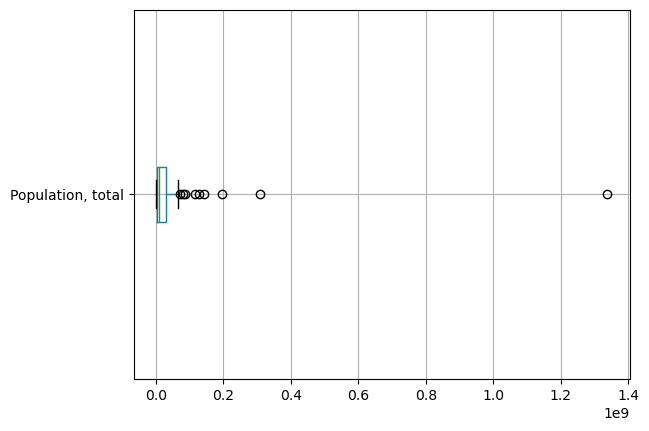

In [1476]:
Data_Indicator_byCountry.boxplot(column='Population, total', vert= False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

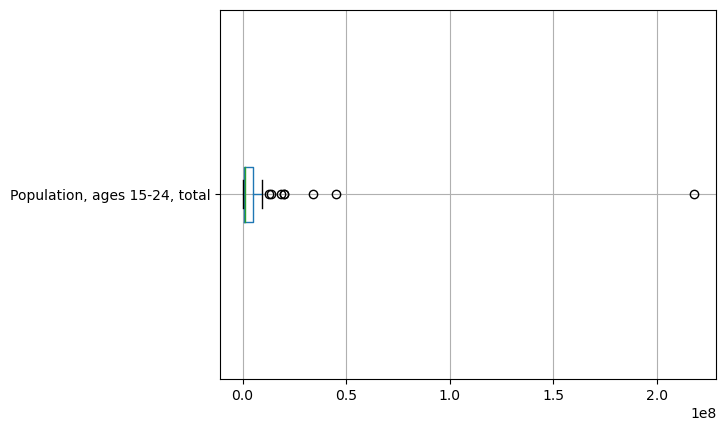

In [1477]:
Data_Indicator_byCountry.boxplot(column='Population, ages 15-24, total', vert= False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

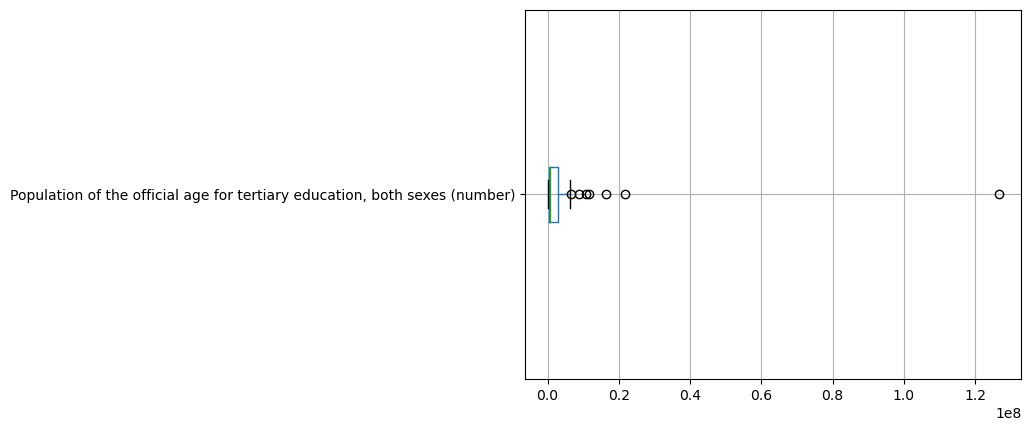

In [1478]:
Data_Indicator_byCountry.boxplot(column='Population of the official age for tertiary education, both sexes (number)', vert= False)
plt.show

>Sur ces trois graphiques, on observe bien plusieurs outliers, parmi lesquels un qui semble encore beaucoup plus grands que les autres

>Celà confirme bien qu'il y'a des outliers dans notre df

>Vérifions le/les pays concernés pour mieux comprendre 

In [1479]:
Data_Indicator_byCountry.loc[Data_Indicator_byCountry['Population, total']==1.337689e+09, : ]

Indicator Name_x,"Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Labor force, total","Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)","Population of the official age for tertiary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total","Population, total","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,
China,30185722.0,4768.37473,9388.0,33.280023,780764742.8,20.09587,126593128.0,16654442.8,217858359.6,1.337689e+09,4.34


>Nous pouvons donc constater que c'est bien la Chine qui detient toutes les valeurs maximales concernant les indicateurs de populations, ce qui est logique car la Chine est le pays le plus peuplé du monde 

>Nous n'allons pas changer ces valeurs pour notre analys exploratoire car elles réflètent la réalité

----------------
---------------

## ETAPE 4 : CREATION DES GRAPHIQUES ET INTERPRETATION

#### A- Démographie générale

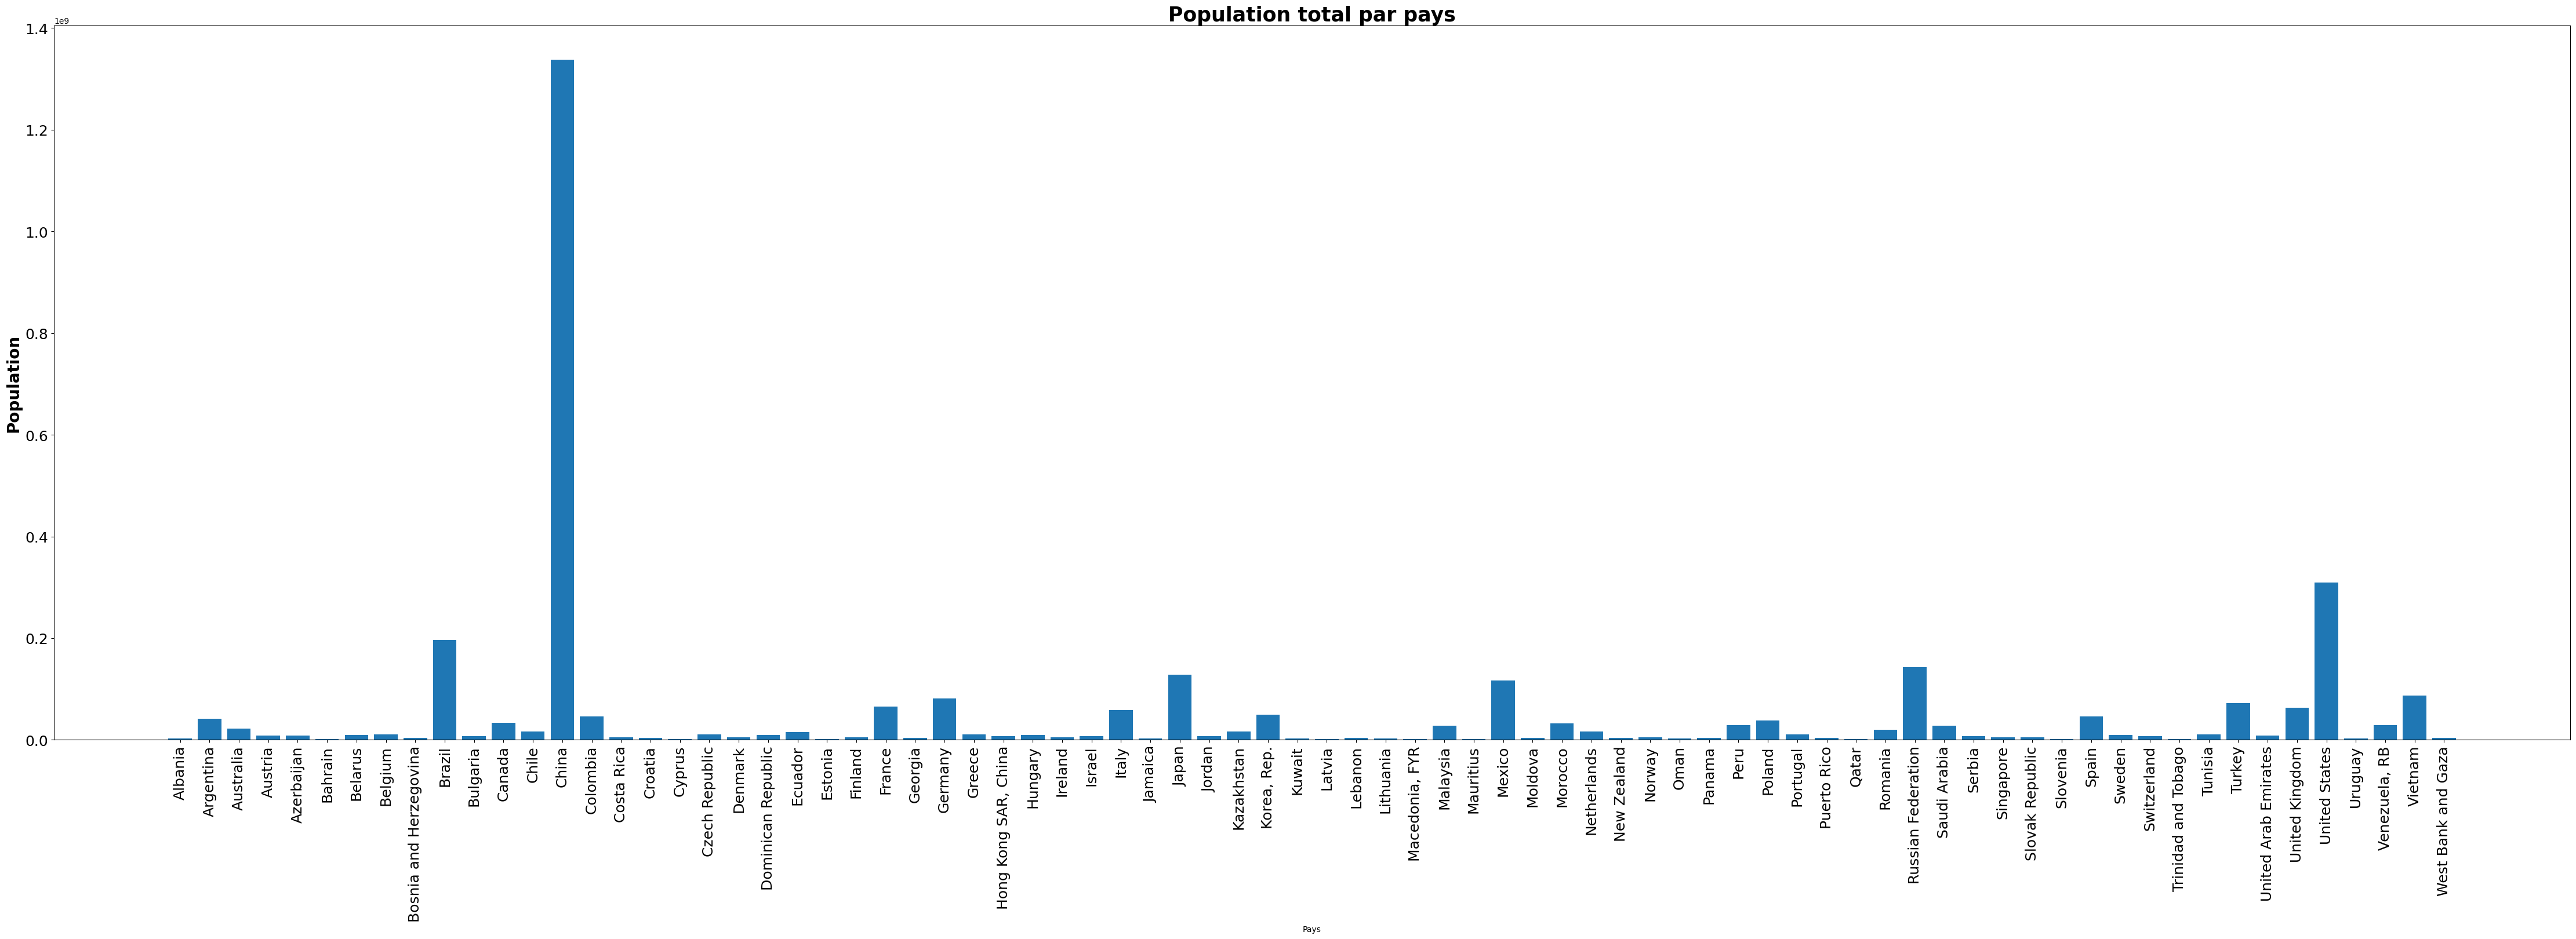

In [1480]:
plt.figure(figsize=(56, 16)) 
plt.bar(height=Data_Indicator_byCountry['Population, total'], x=Data_Indicator_byCountry.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Pays")
plt.ylabel("Population", fontsize=20, fontweight='bold')
plt.title("Population total par pays", fontsize=25, fontweight='bold')
plt.show()

- Sans surprise, la Chine arrive en tête avec la plus grande population de notre échantillon, suivie des États-Unis et du Brésil.

- Ces données nous donnent un aperçu initial des pays pouvant être ciblés prioritairement selon leur poids démographique.

- En effet, plus la population est importante, plus le nombre de clients potentiels pour notre plateforme de formation en ligne l'est également.

- On remarque également la présence de pays asiatiques comme le Japon et le Vietnam parmi les plus peuplés.

- Cela suggère que l'Asie pourrait représenter une région clé en termes de potentiel démographique.

- Pour confirmer cette hypothèse, il serait pertinent de poursuivre l'analyse au niveau régional.

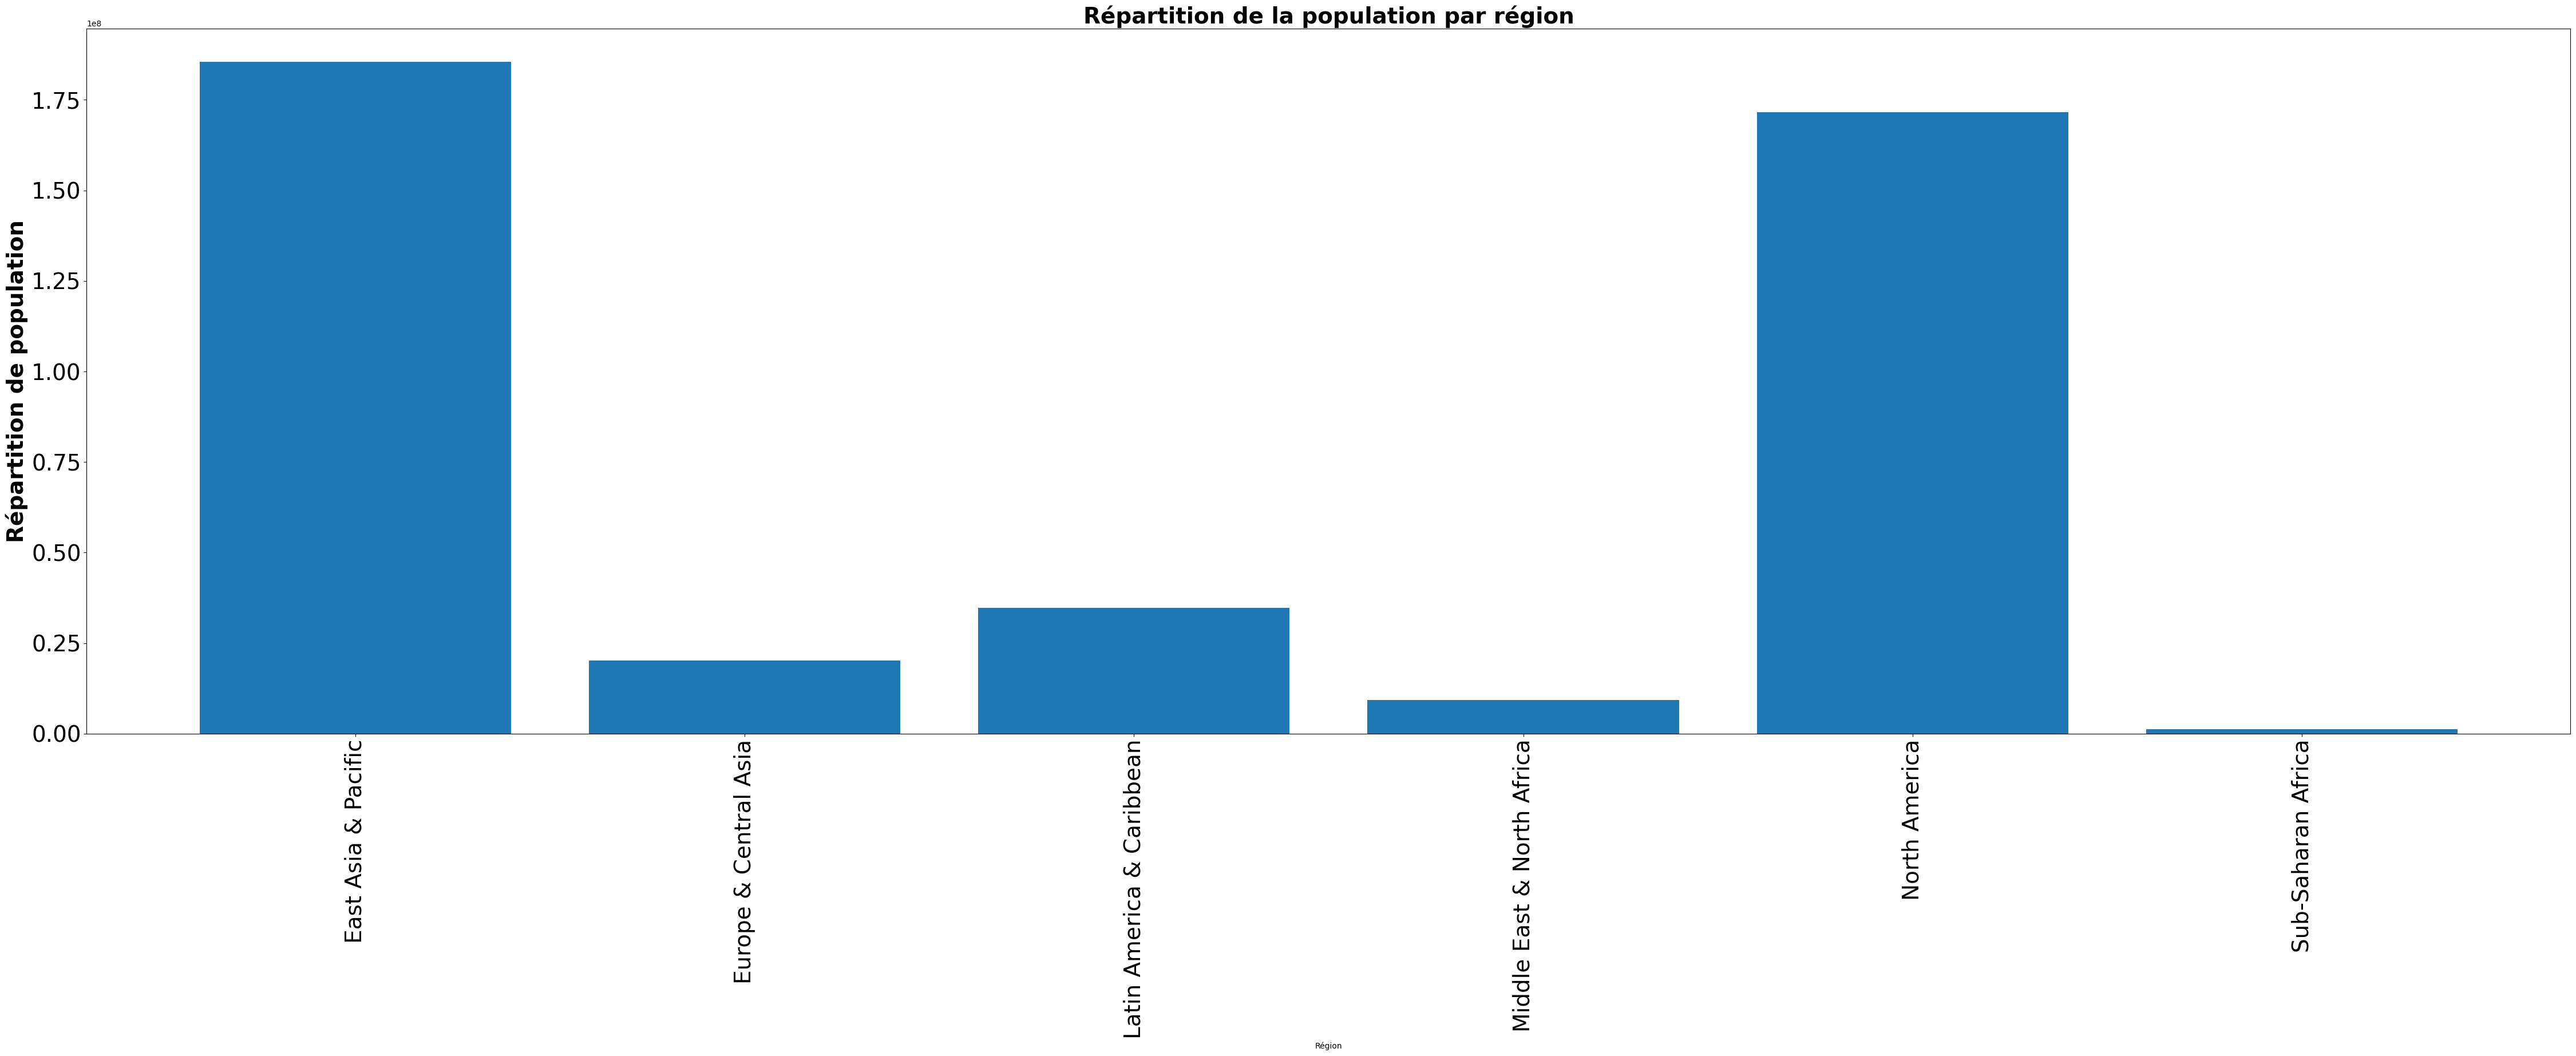

In [1481]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Population, total'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel("Région")
plt.ylabel("Répartition de population", fontsize=28, fontweight='bold')
plt.title("Répartition de la population par région", fontsize=28, fontweight='bold')
plt.show()

- Cette répartition confirme bien notre prédiction, la région Asie et Pacifique mène la cadence, suivie par l'Amérique du Nord
- Vérifions les proportions pour avoir un apperçu globale sur notre échantillon 

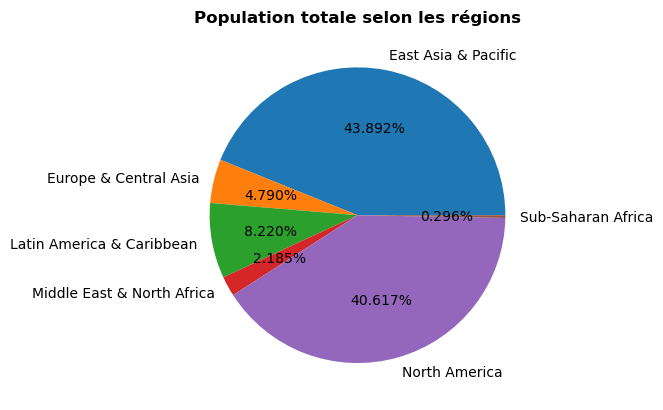

In [1482]:
plt.pie(x=Data_Indicator_byRegion['Population, total'], labels=Data_Indicator_byRegion.index, autopct='%.3f%%')
plt.title("Population totale selon les régions", fontsize=12, fontweight='bold')
plt.show()

- Les régions Asie de l'Est et Pacifique et Amérique du nord représentent juste à eux deux environ 80 % de la population totale de l'échantillon, toutes régions confondues.

- Ce chiffre confirme un fort potentiel démographique dans cette zone, ce qui en fait une cible stratégique pour le développement depour le développement de notre offre.

- Toutefois, il est essentiel de ne pas se baser uniquement sur la population totale.

- Il faut maintenant s'intéresser à la tranche d'âge 15-24 ans , qui constitue le cœur de notre cible (lycéens, étudiants, jeunes adultes).

- Cela nous permettra d'identifier les régions et pays où la jeunesse est non seulement nombreuse, mais aussi éventuellement réceptive à nos formations en ligne.

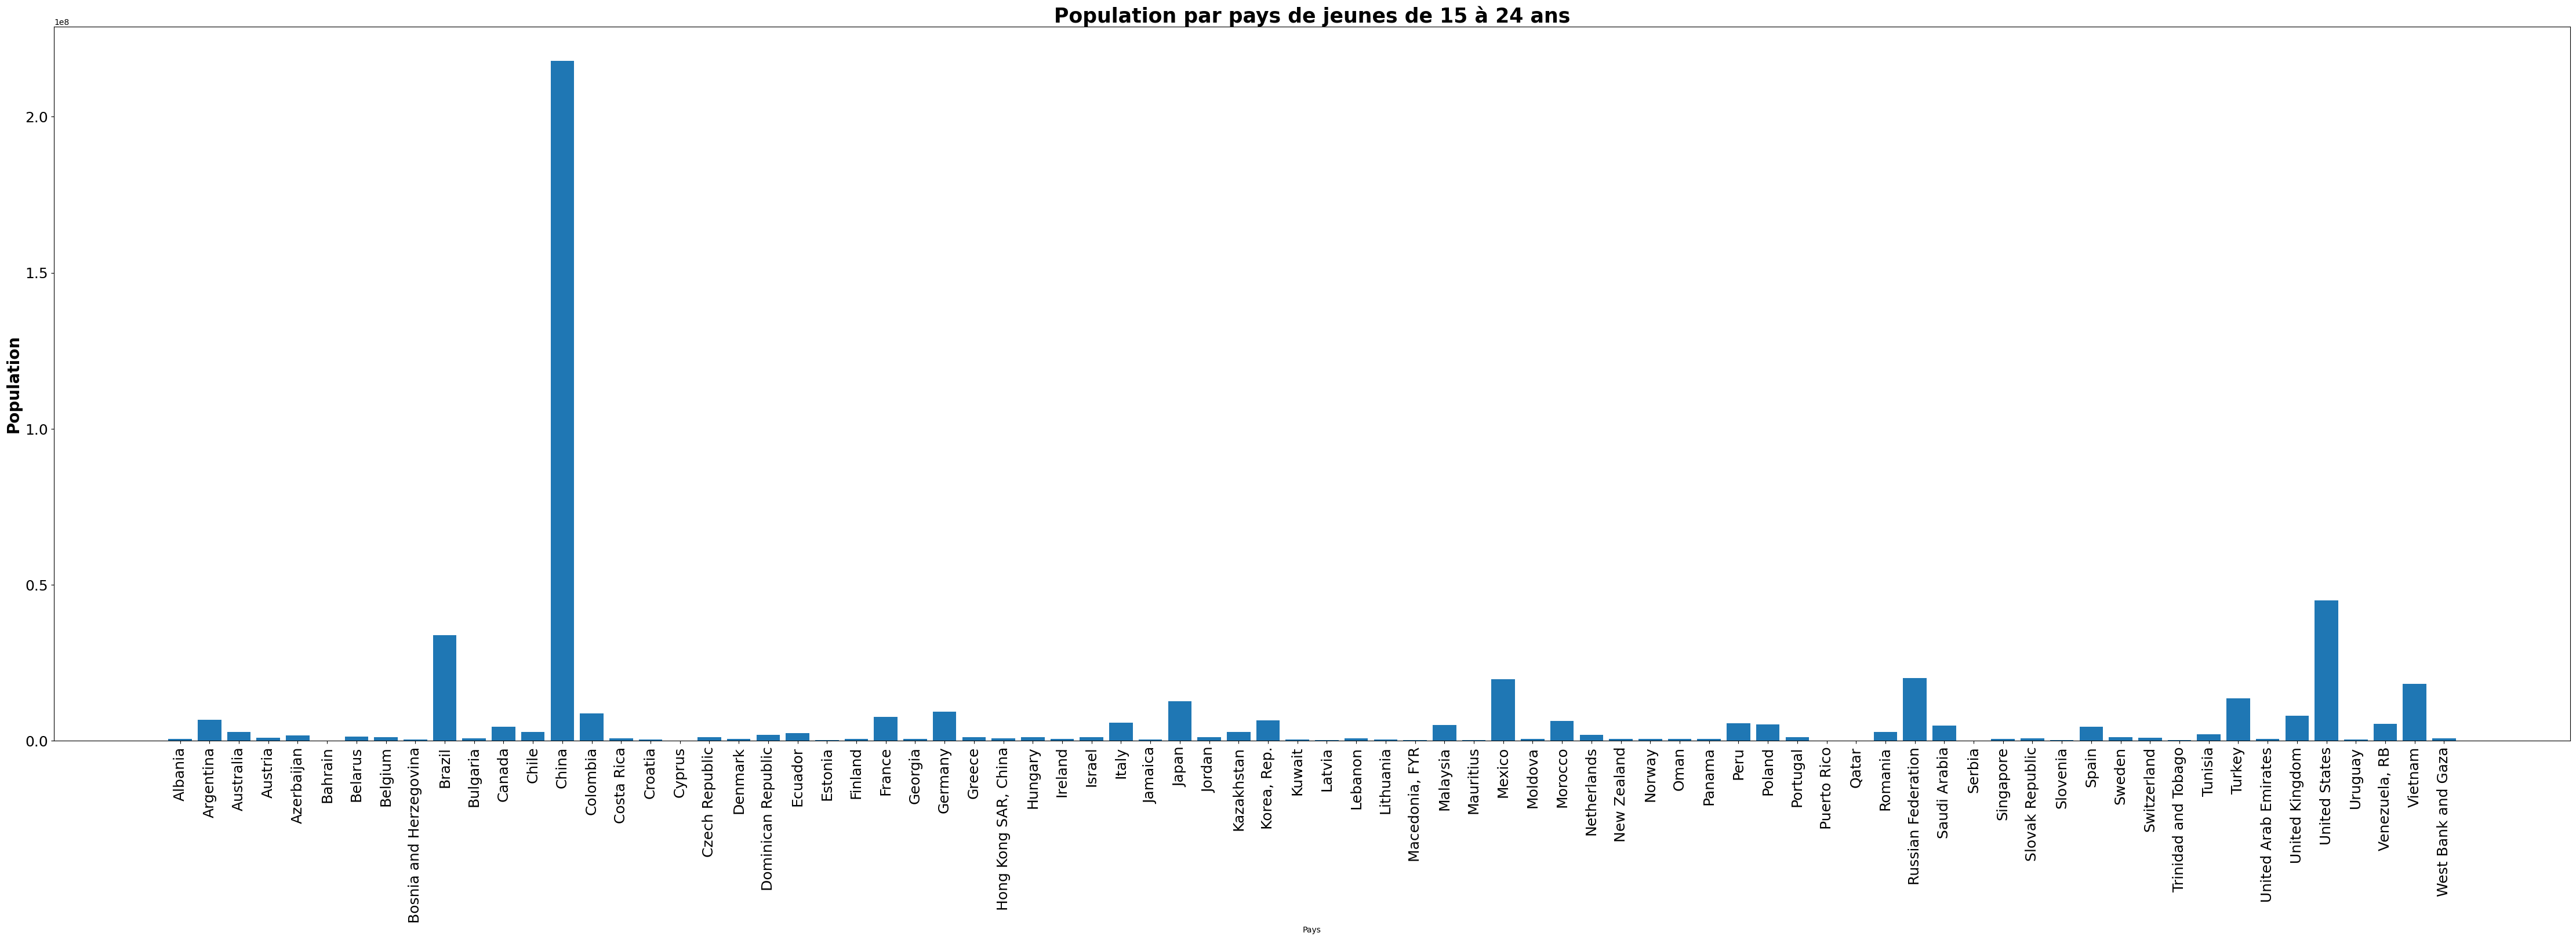

In [1483]:
plt.figure(figsize=(56, 16)) 
plt.bar(height=Data_Indicator_byCountry['Population, ages 15-24, total'], x=Data_Indicator_byCountry.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Pays")
plt.ylabel("Population", fontsize=20, fontweight='bold')
plt.title("Population par pays de jeunes de 15 à 24 ans", fontsize=25, fontweight='bold')
plt.show()

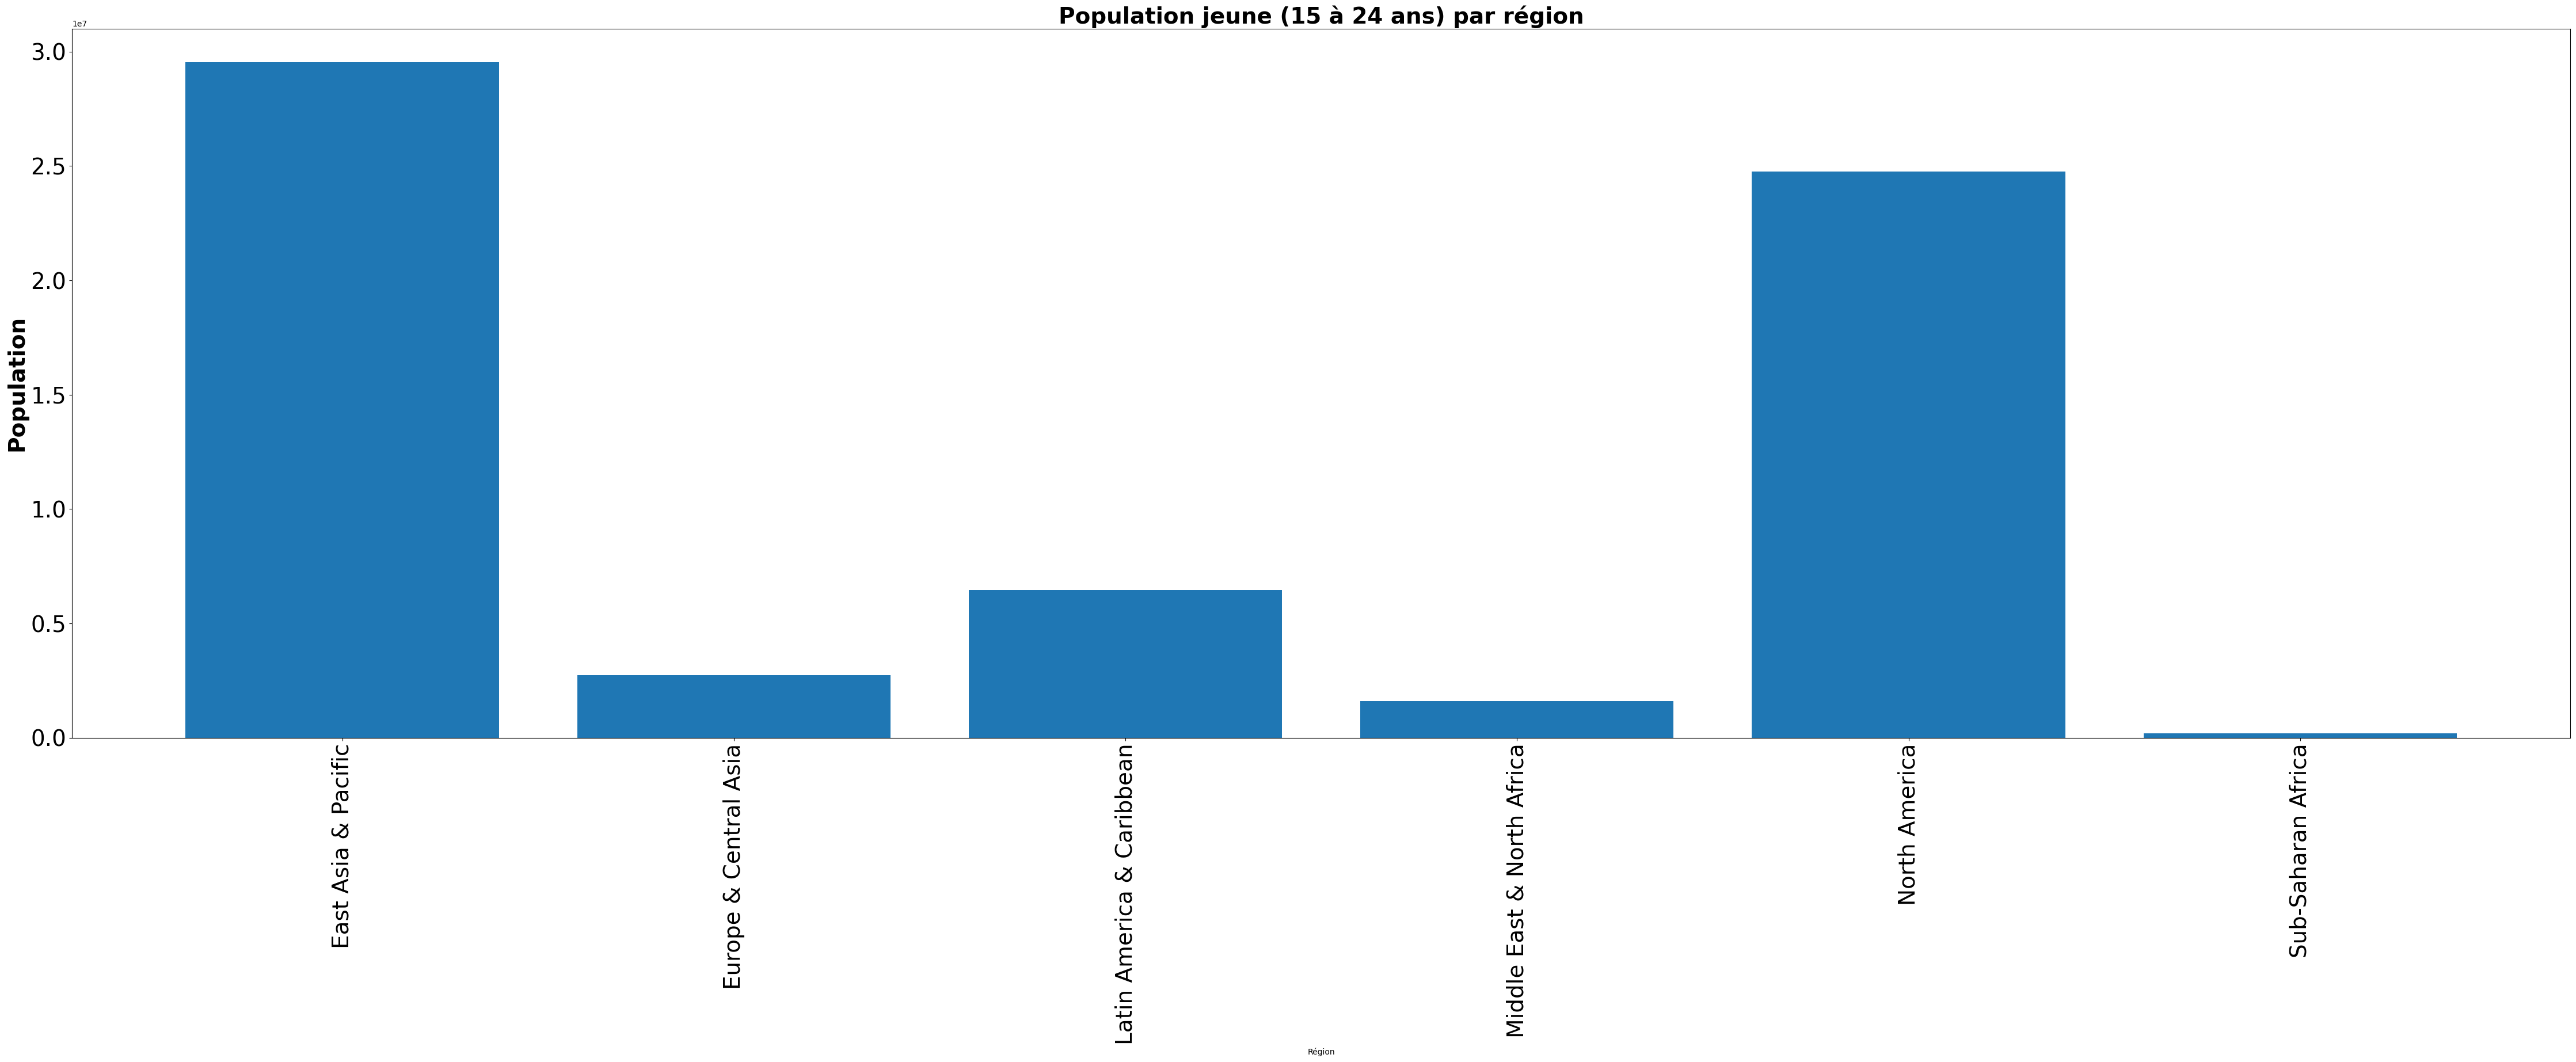

In [1484]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Population, ages 15-24, total'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel("Région")
plt.ylabel("Population", fontsize=28, fontweight='bold')
plt.title("Population jeune (15 à 24 ans) par région", fontsize=28, fontweight='bold')
plt.show()

- En ce qui concerne la jeunesse (15-24 ans) , la répartition démographique suit globalement la même tendance que celle enregistrée dans la population totale 

- Les régions asiatiques , notamment l' Asie de l'Est et Pacifique ainsi  , se place une fois de plus en tête , avec une part importante de jeunes dans leur population.

- Cette surreprésentation de la jeunesse dans ces régions renforce leur attrait en tant que marchés potentiels pour des formations en ligne destinédestiné aux lycéens et étudiants.

- Prochaine étape dans l'enseignement secondaire et supérieure

#### B- Démographie dans l'education et corrélation avec les facteurs économiques

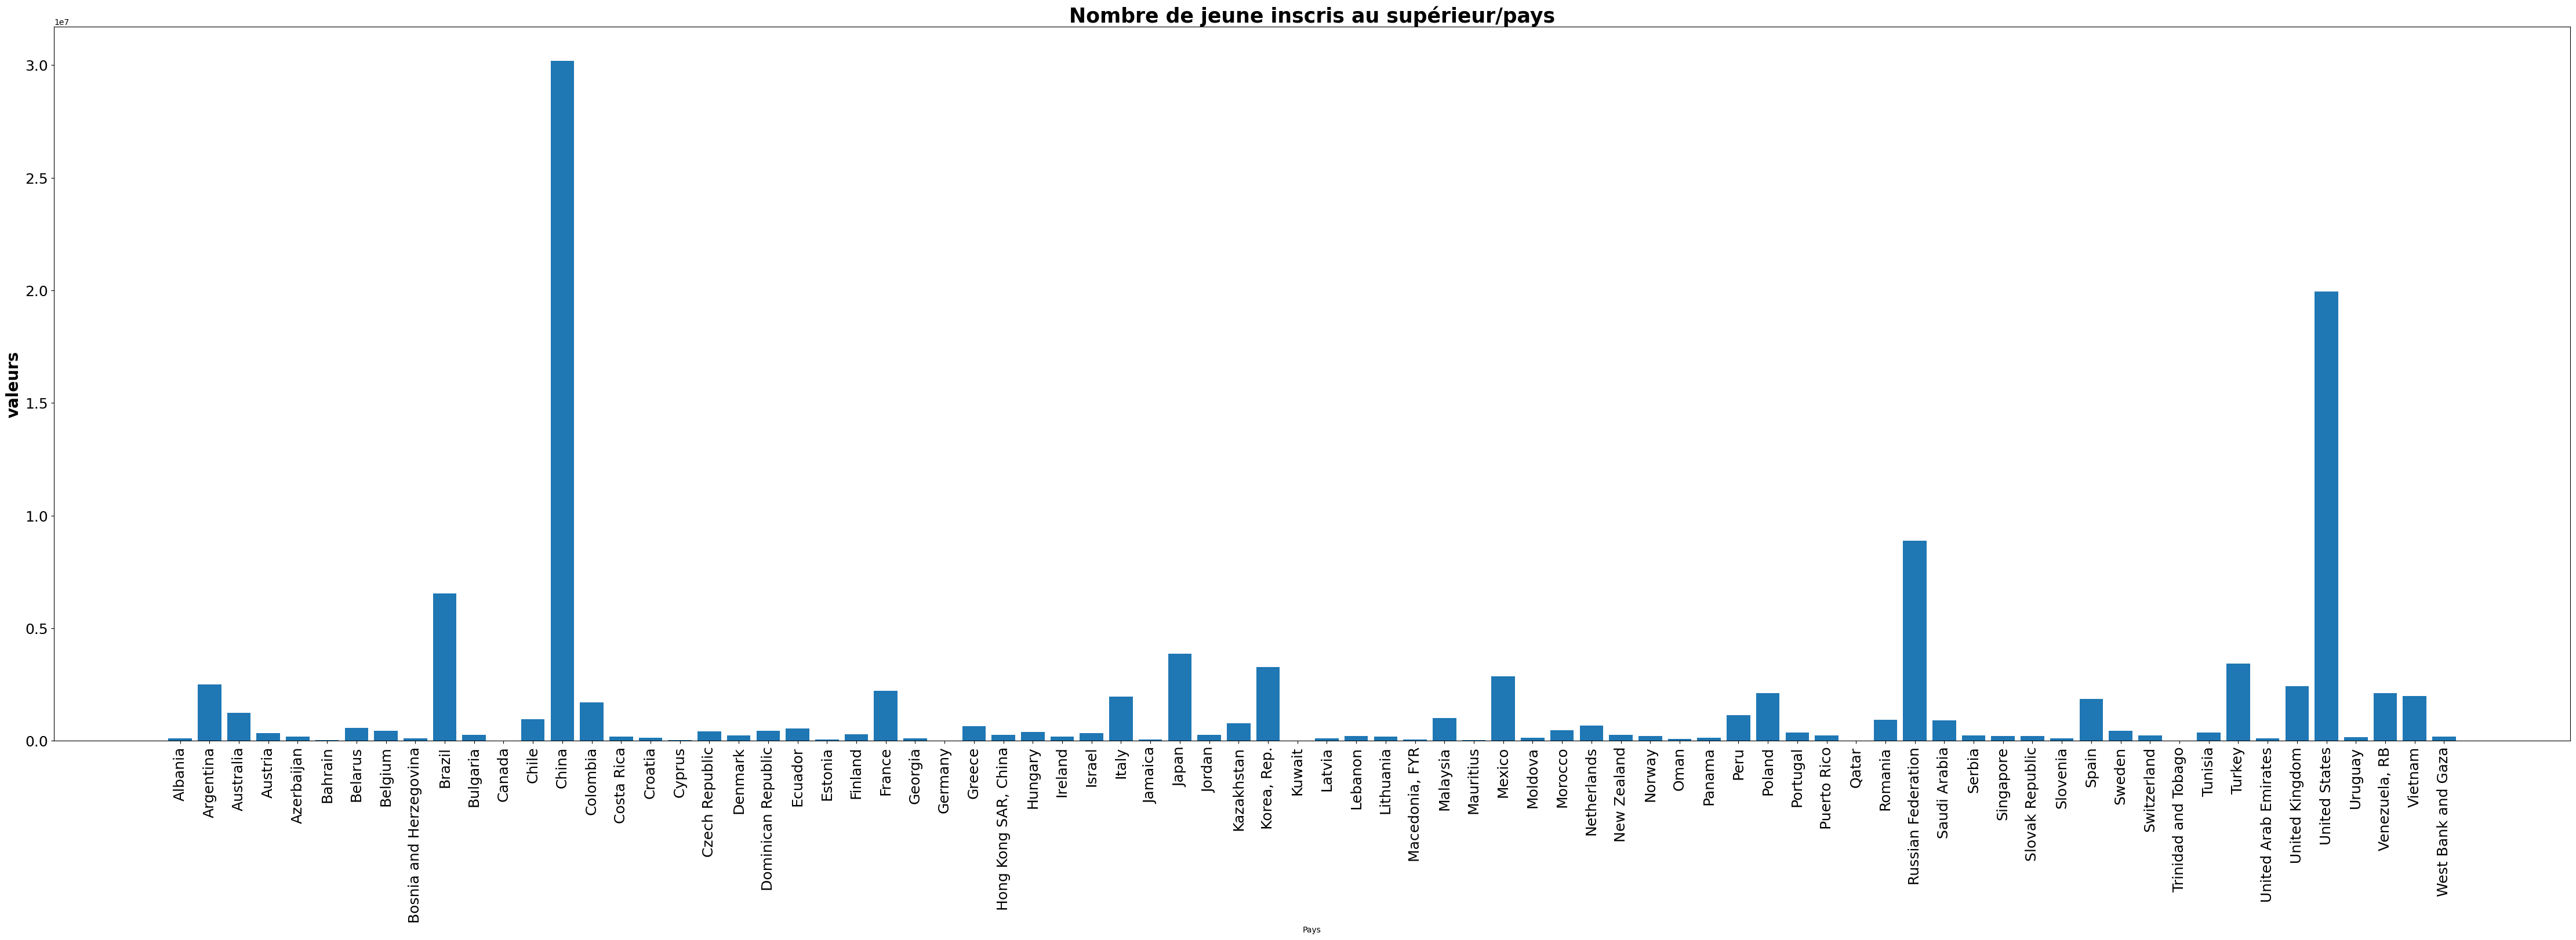

In [1485]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byCountry['Enrolment in tertiary education, all programmes, both sexes (number)'], x=Data_Indicator_byCountry.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Pays")
plt.ylabel("valeurs", fontsize=20, fontweight='bold')
plt.title("Nombre de jeune inscris au supérieur/pays", fontsize=25, fontweight='bold')
plt.show()

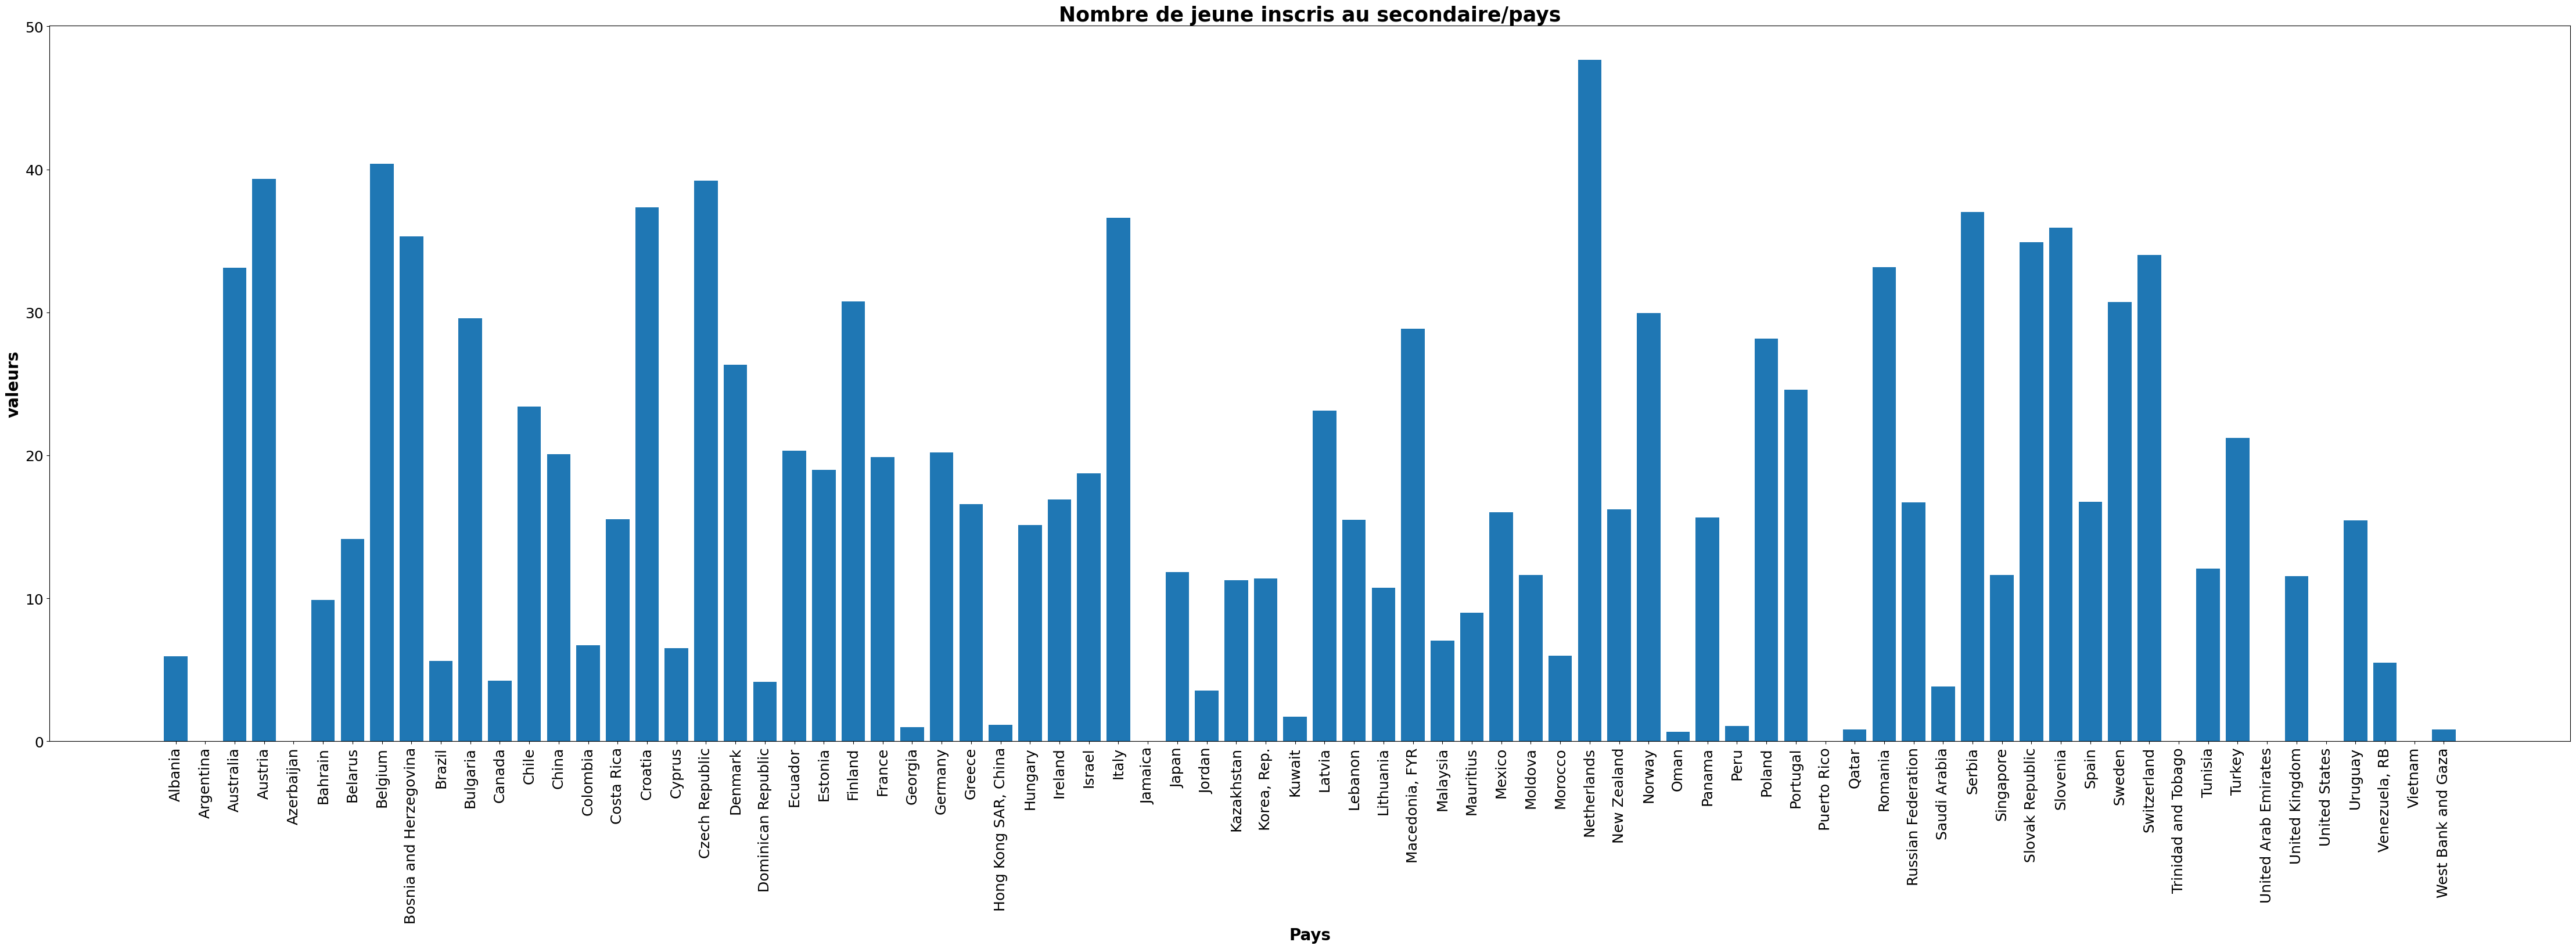

In [1486]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byCountry['Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)'], x=Data_Indicator_byCountry.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Pays", fontsize=20, fontweight='bold')
plt.ylabel("valeurs", fontsize=20, fontweight='bold')
plt.title("Nombre de jeune inscris au secondaire/pays", fontsize=25, fontweight='bold')
plt.show()

>Regroupons ces données par région pour avoir une meilleure vue globale

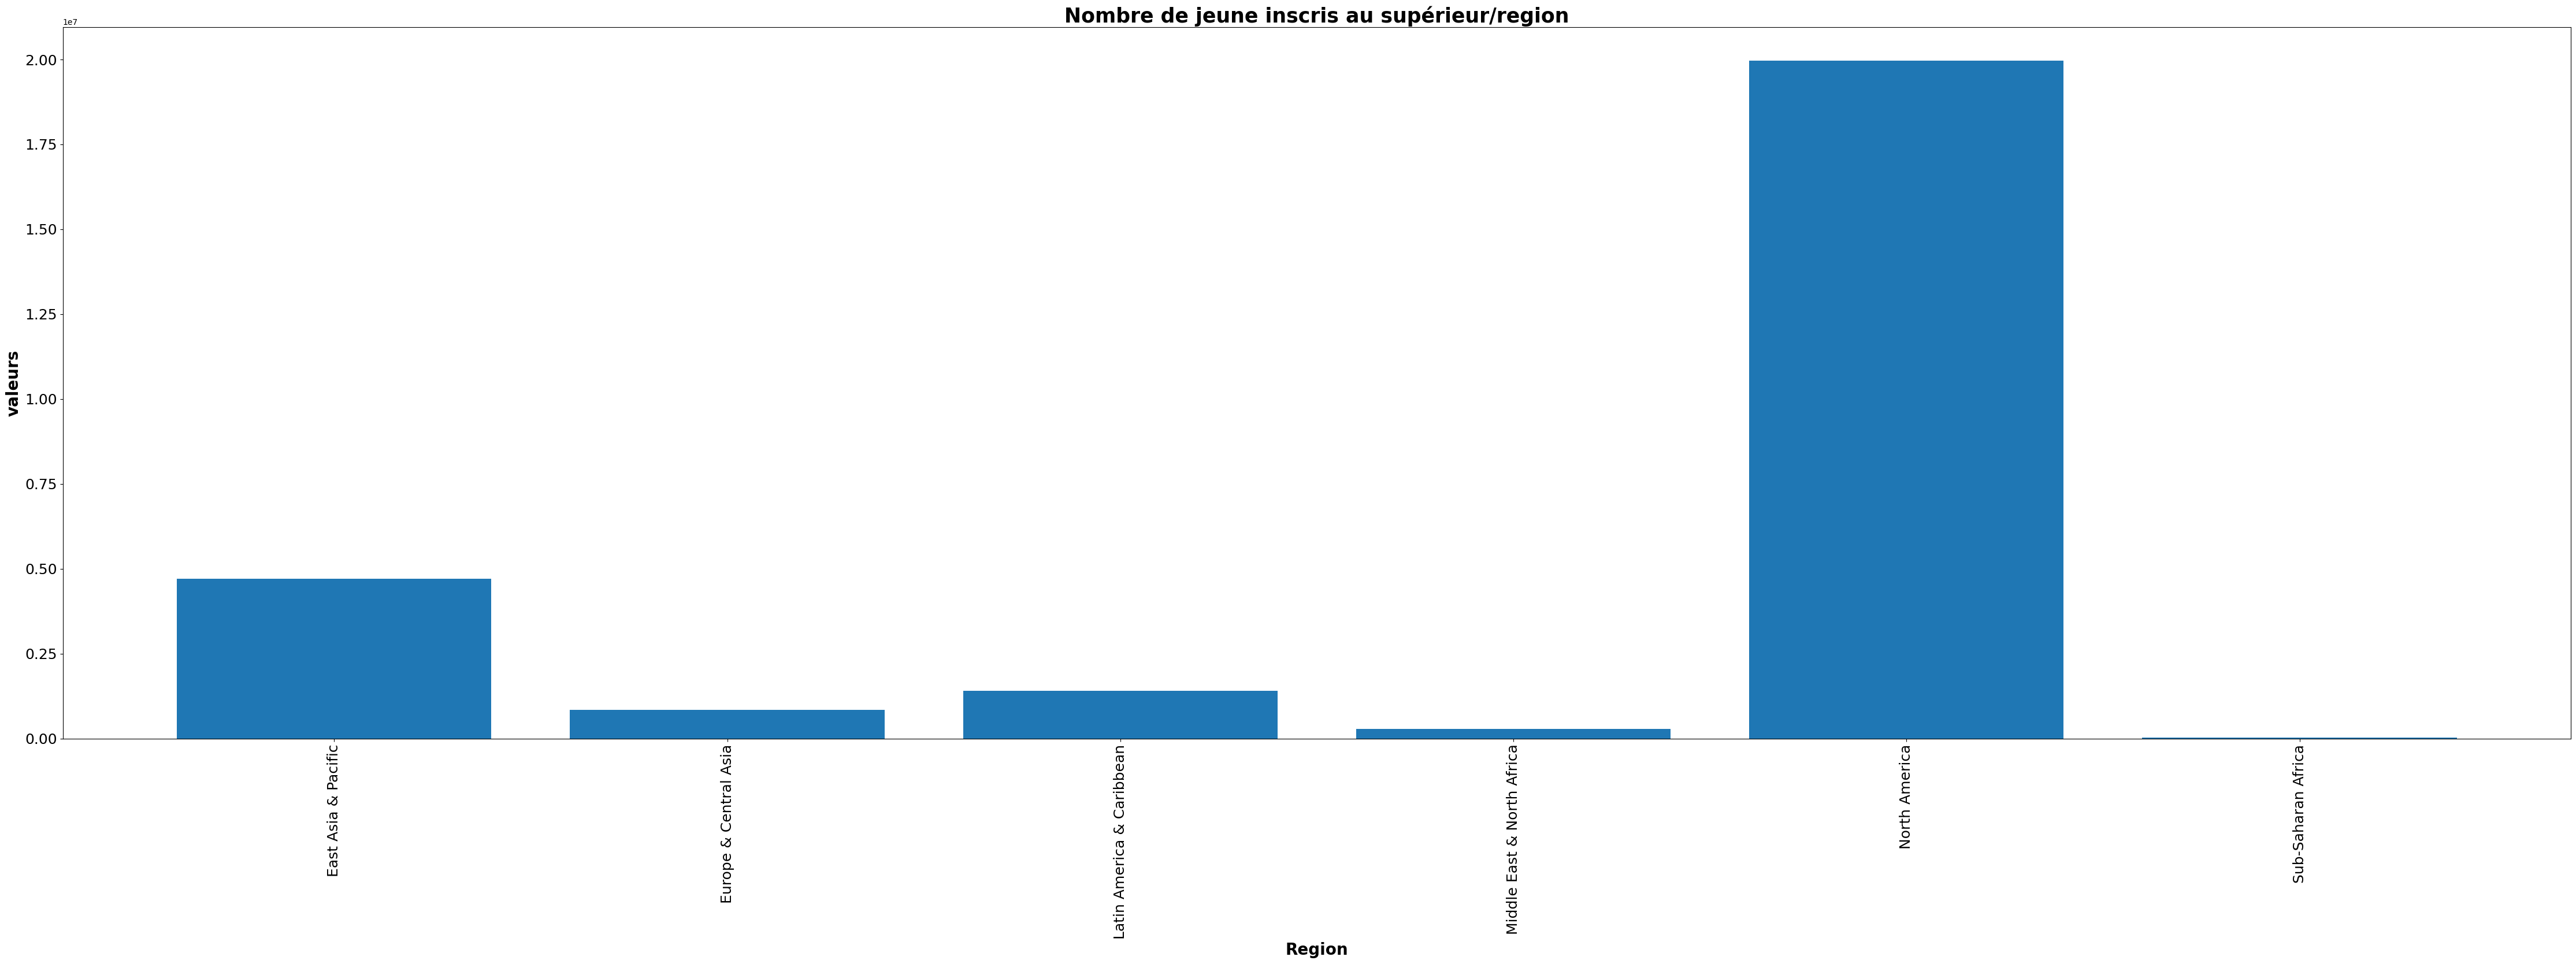

In [1487]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Enrolment in tertiary education, all programmes, both sexes (number)'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Region", fontsize=20, fontweight='bold')
plt.ylabel("valeurs", fontsize=20, fontweight='bold')
plt.title("Nombre de jeune inscris au supérieur/region", fontsize=25, fontweight='bold')
plt.show()

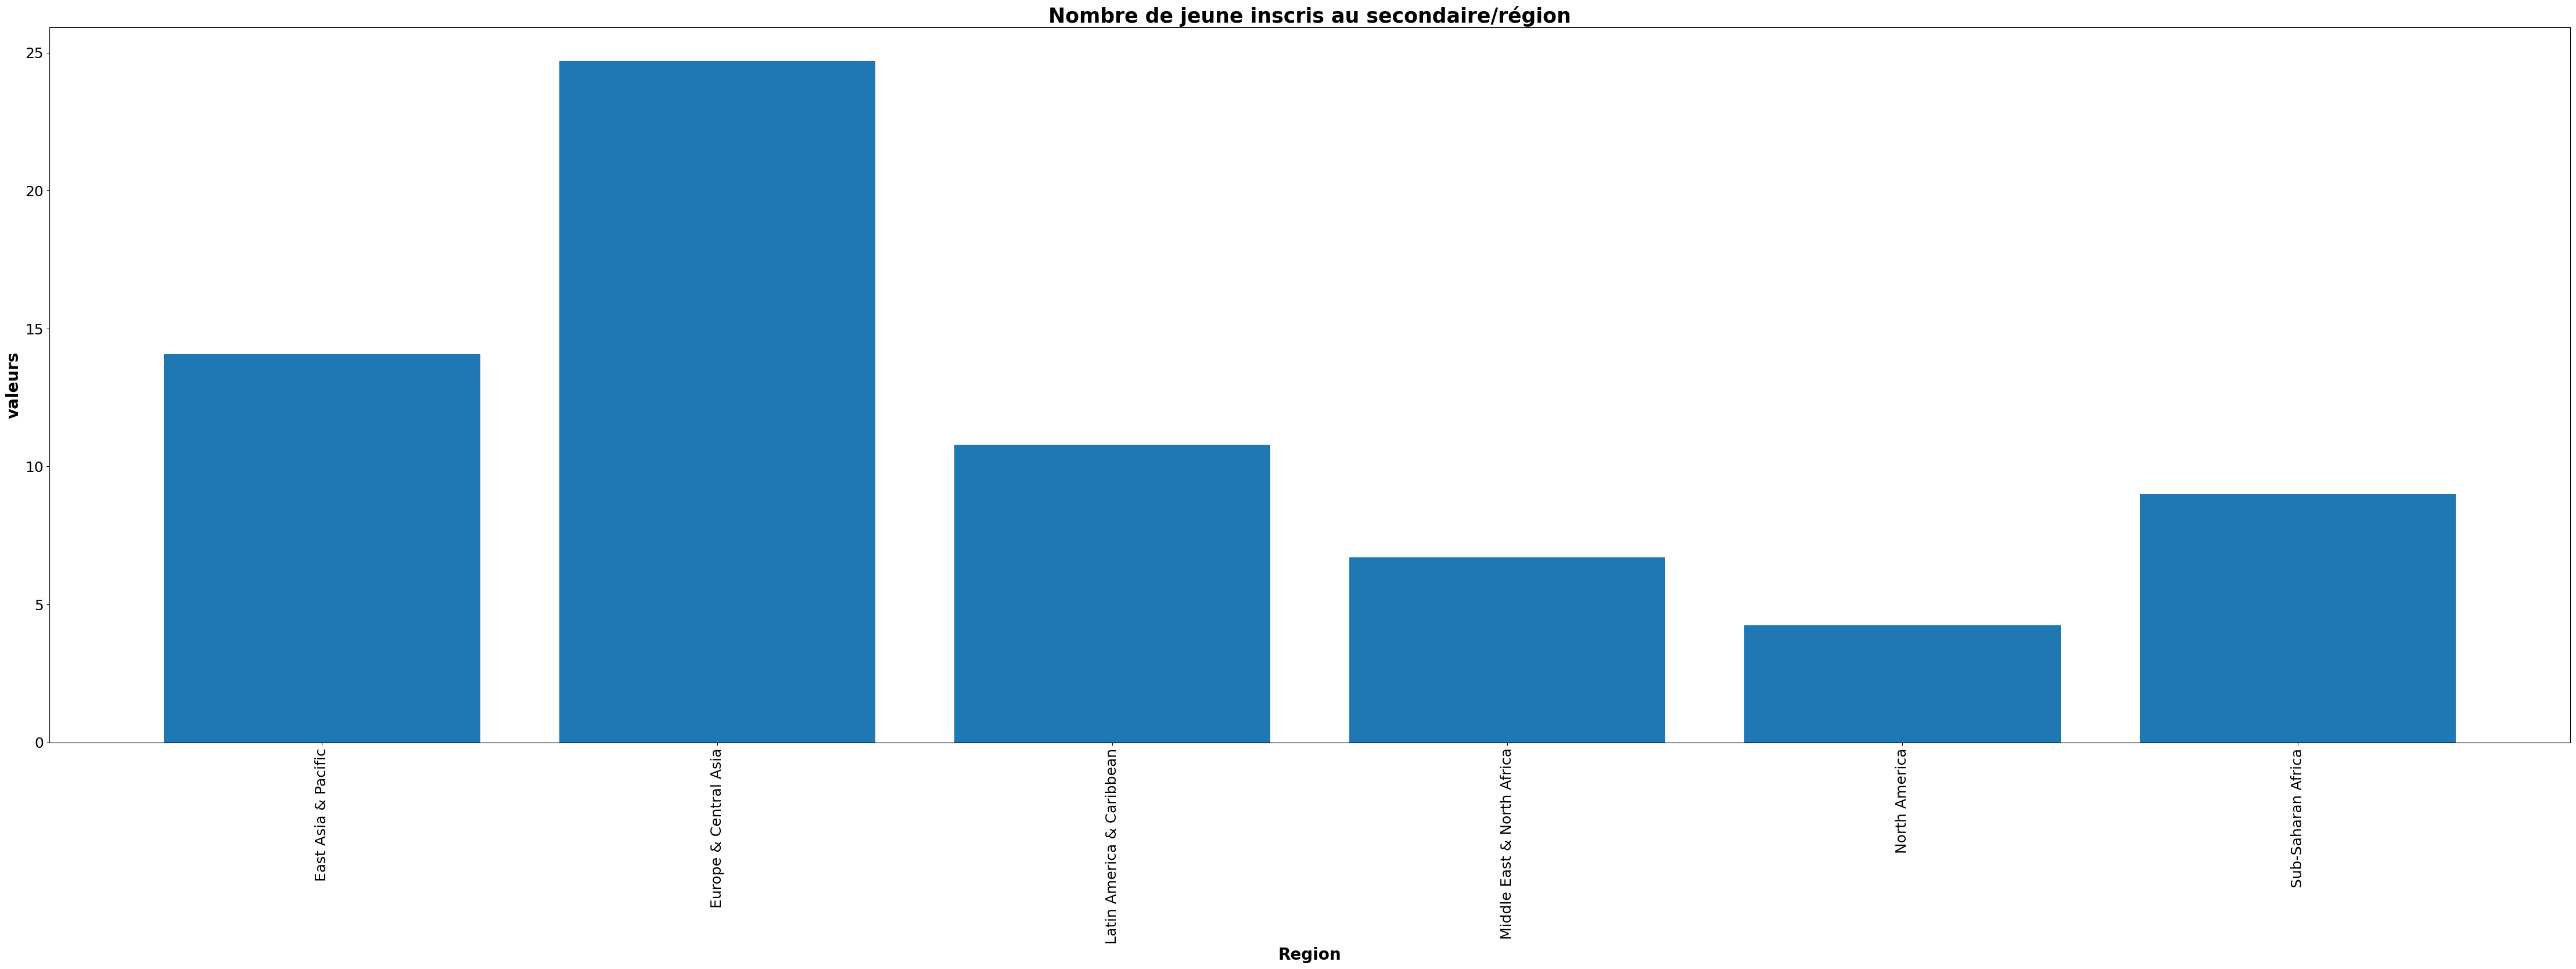

In [1488]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Region",fontsize=20, fontweight='bold')
plt.ylabel("valeurs", fontsize=20, fontweight='bold')
plt.title("Nombre de jeune inscris au secondaire/région", fontsize=25, fontweight='bold')
plt.show()

Concernant les inscription dans l'enseignement secondaire:

- Les données indiquent une proportion importante de jeunes inscrits dans l'enseignement secondaire en Europe et en Asie centrale.
- Le taux d'inscription est mené par les Pays Bas et la Belgique
- L'Afrique en général, l'Amérique latine & Caraiben présentent également des taux d'inscription moyennement élevé.
- Ces taux d'inscription reflètent un intérêt significatif des jeunes pour l'éducation et l'apprentissage dans ces régions.
- Cet intérêt marqué fait de ces zones des marchés potentiels attractifs pour vos offres.

Concernant le supérieur 
- Les données révèlent une différence significative entre l'Amérique du Nord et les autres régions en matière de taux d'inscription dans l'enseignement supérieur.
- L'Asie de l'Est et Pacifique, montrent eux aussi un taux d'inscription très elevé.
Cette disparité suggère un niveau d'engagement plus élevé envers l'éducation dans ces régions.
- Concernant les pays, il semble que les États-Unis et la Chine en concordance avec une forte population jeunes accordent une importance particulière à l'investissement dans l'éducation.
- Pour comprendre les tendances globales, il est recommandé d'analyser la corrélation entre le taux d'inscription et la population jeune.
Cela permettra de voir si ces tendances se confirment.

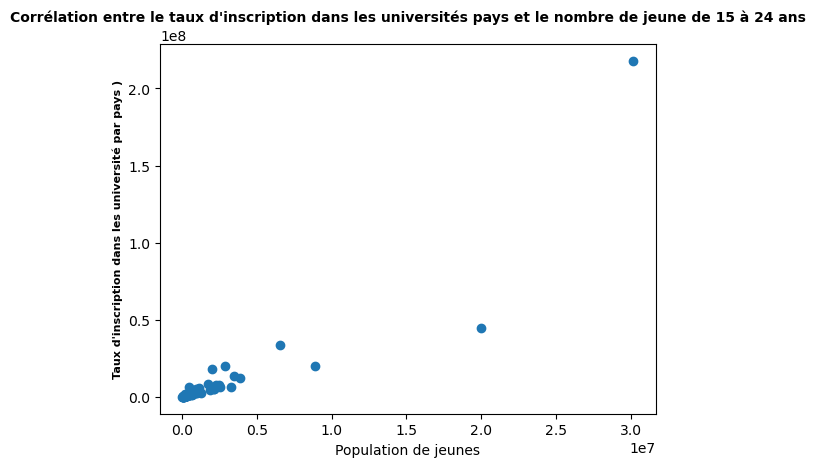

In [1489]:
plt.scatter(Data_Indicator_byCountry['Enrolment in tertiary education, all programmes, both sexes (number)'], Data_Indicator_byCountry['Population, ages 15-24, total'])
plt.xlabel("Population de jeunes")
plt.ylabel("Taux d'inscription dans les université par pays )", fontsize=8, fontweight='bold')
plt.title("Corrélation entre le taux d'inscription dans les universités pays et le nombre de jeune de 15 à 24 ans", fontsize=10, fontweight='bold')
plt.show()


Tendance globale positive :
- Il existe une corrélation positive entre la taille de la population des 15-24 ans et le taux d'inscription dans l'enseignement supérieur. En d'autres termes, les pays avec une population jeune importante tendent à avoir un nombre élevé d'étudiants.
- Cette tendance suggère que la démographie juvénile est un indicateur pertinent pour évaluer la demande potentielle de nos formations en ligne.

Identification d'exceptions :
- Cependant, certains pays avec une forte population jeune affichent un faible taux d'inscription dans l'enseignement supérieur. Ces pays, qui semblent accorder moins d'importance à l'éducation, ne représentent pas une cible prioritaire, mais restent quand même des pays à fort potentiel au vue d'une grande présence de la jeunesse. 


Implication pour la stratégie de marché :
- La corrélation observée renforce l'idée que cibler les pays avec une population jeune significative permet de toucher un marché potentiellement intéressé par nos services.
- En d'autres termes, la taille de la population jeune est un indicateur précieux de l'intérêt pour l'éducation et, par conséquent, pour nos services.


Analyse complémentaire :
Il est recommandé d'étudier également la corrélation entre le pouvoir d'achat et l'intérêt pour les études, afin d'affiner notre stratégie de ciblage.

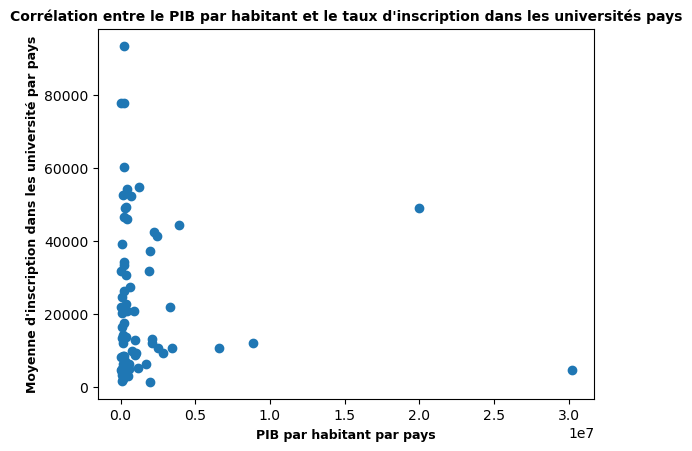

In [1490]:
plt.scatter(Data_Indicator_byCountry['Enrolment in tertiary education, all programmes, both sexes (number)'], Data_Indicator_byCountry['GDP per capita (current US$)'])
plt.xlabel("PIB par habitant par pays", fontsize=9, fontweight='bold')
plt.ylabel("Moyenne d'inscription dans les université par pays", fontsize=9, fontweight='bold')
plt.title("Corrélation entre le PIB par habitant et le taux d'inscription dans les universités pays", fontsize=10, fontweight='bold')
plt.show()

- Globalement il n'y a pas de corélation entre le PIB par habitant et la taux d'inscription dans les universités, 
- Le fait que les points soient alignés verticalement, plutôt que suivant une diagonale ascendante ou descendante, suggère qu'il n'y a pas de corrélation linéaire forte entre le PIB par habitant et le taux d'inscription.
- Ce qui suppose que le PIB n'est pas nécéssairement un facteur influençant l'interêt des pays pour l'éducation
- En d'autres termes, les variations du PIB par habitant n'ont pas un impact significatif sur le taux d'inscription dans les universités,
- Étant donné que l'intérêt pour l'éducation est crucial pour votre marché cible, le PIB par habitant peut être considéré comme un indicateur moins pertinent dans votre stratégie de ciblage.
- Il est donc plus judicieux de se concentrer sur d'autres facteurs qui influencent plus directement l'inscription universitaire.
- Cette observation indique que d'autres facteurs que le PIB par habitant jouent un rôle plus important dans la détermination du taux d'inscription dans les universités.
- Observons donc la corrélation avec pouvoir d'achat par habitant

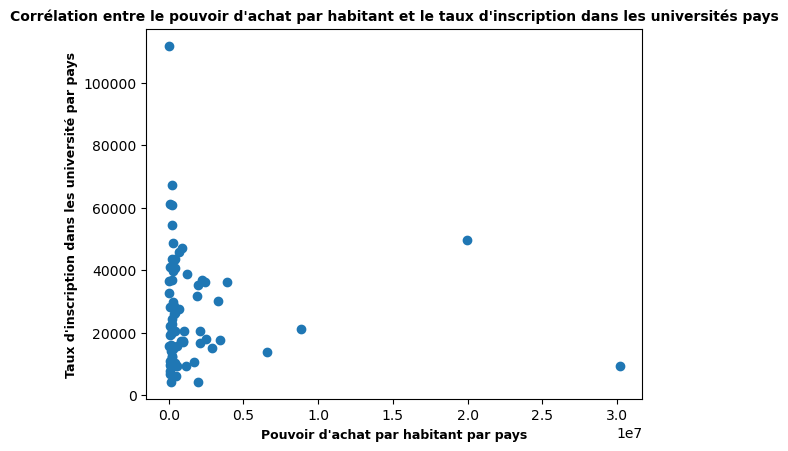

In [1491]:
plt.scatter(Data_Indicator_byCountry['Enrolment in tertiary education, all programmes, both sexes (number)'], Data_Indicator_byCountry['GNI per capita, PPP (current international $)'])
plt.xlabel("Pouvoir d'achat par habitant par pays", fontsize=9, fontweight='bold')
plt.ylabel("Taux d'inscription dans les université par pays", fontsize=9, fontweight='bold')
plt.title("Corrélation entre le pouvoir d'achat par habitant et le taux d'inscription dans les universités pays", fontsize=10, fontweight='bold')
plt.show()

Confirmation d'une faible influence du pouvoir d'achat :
- Le fait que deux mesures différentes du pouvoir d'achat (PIB et RNB ajusté PPA) montrent une corrélation faible ou inexistante suggère que ce n'est pas un facteur primordial dans les inscriptions universitaire.
- Cela signifie que, contrairement aux attentes, le fait d'avoir une population aisé n'est pas synonyme de fort taux d'inscription.

#### C- Utilisation d'internet, chômages

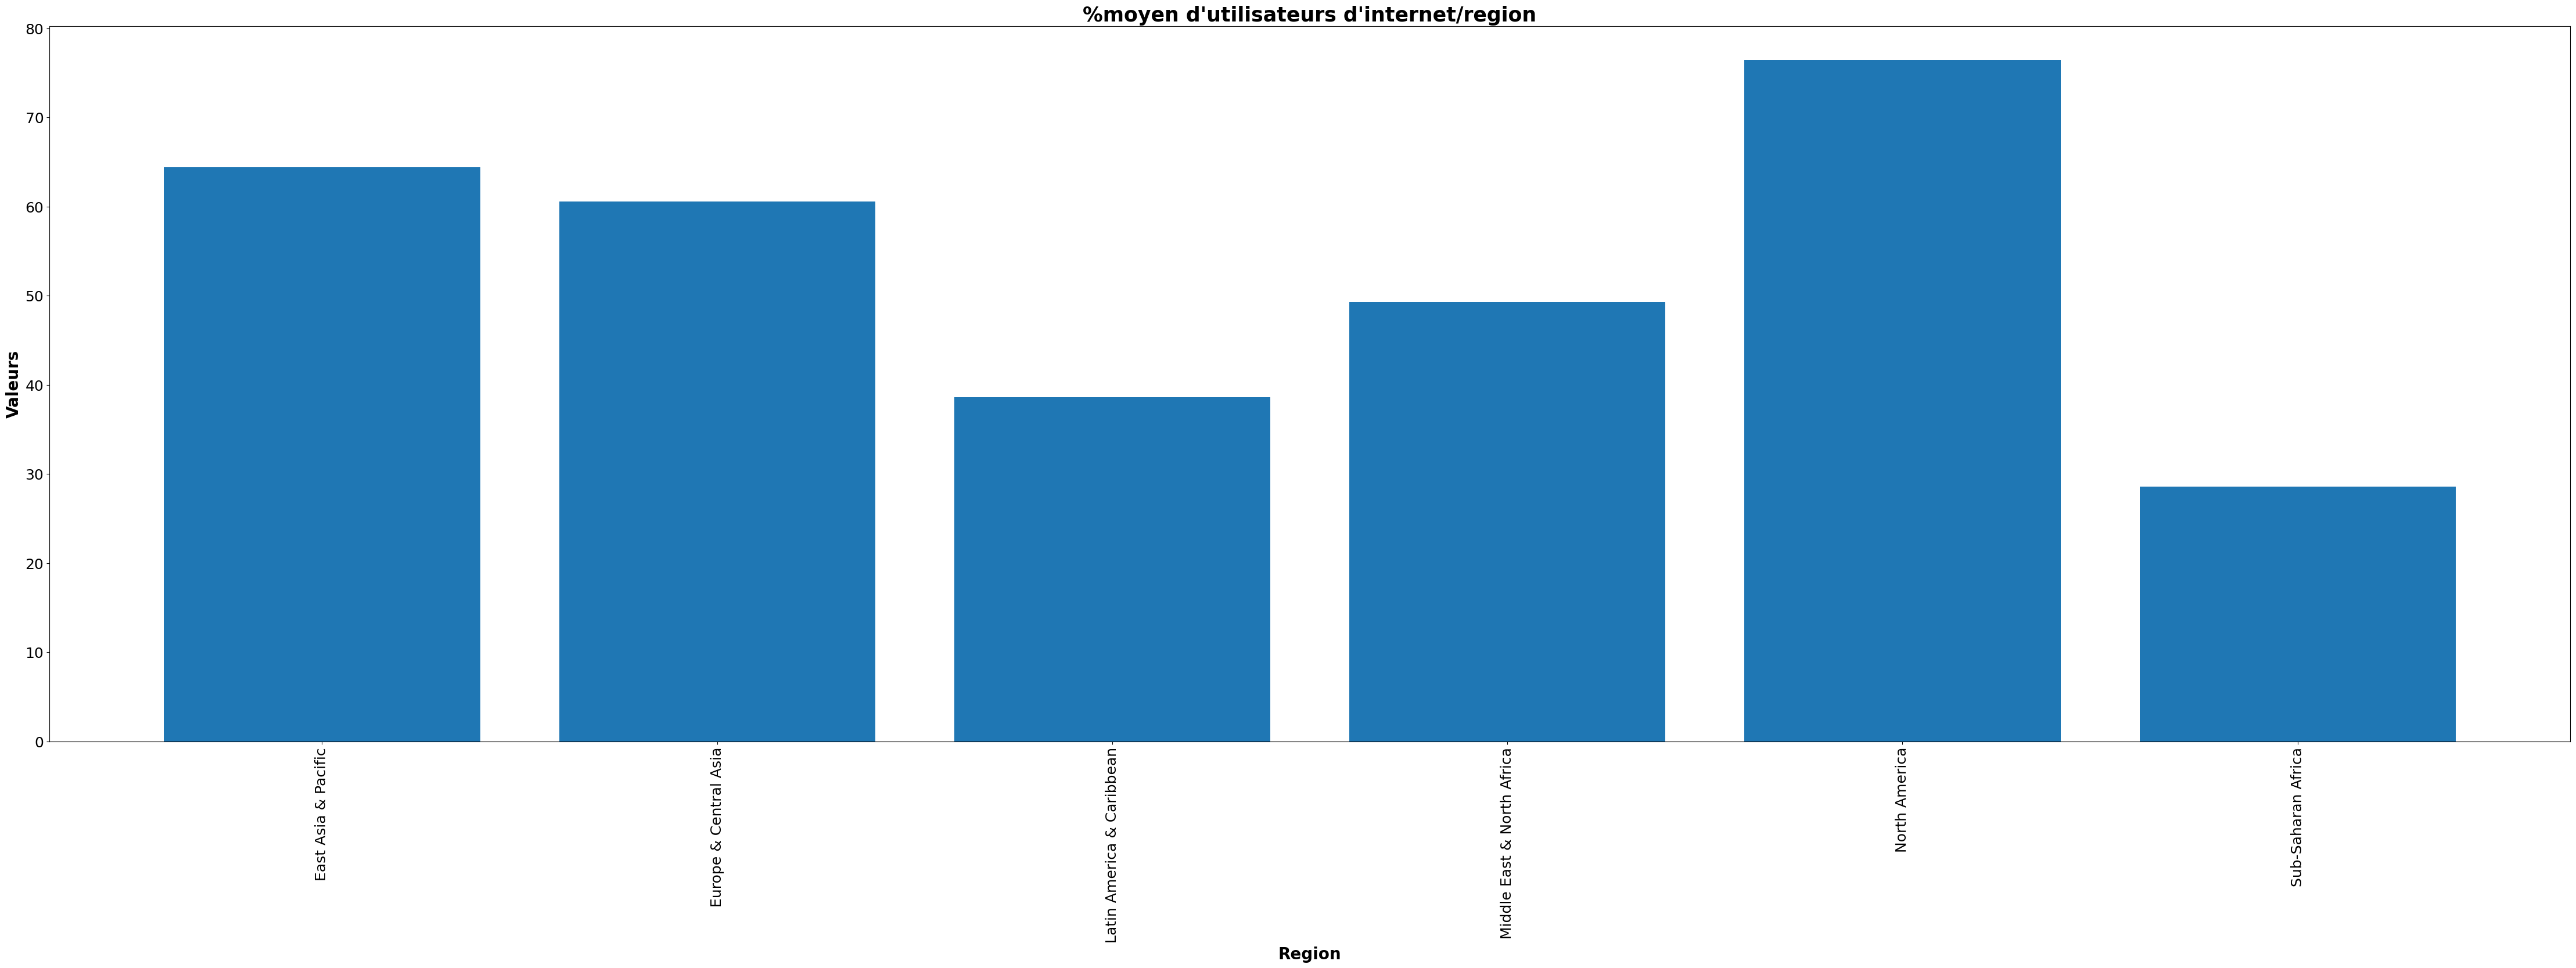

In [1492]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Internet users (per 100 people)'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Region", fontsize=20, fontweight='bold')
plt.ylabel("Valeurs", fontsize=20, fontweight='bold')
plt.title("%moyen d'utilisateurs d'internet/region", fontsize=25, fontweight='bold')
plt.show()


- Le graphique révèle une forte concentration d'utilisateurs d'Internet en Amérique du Nord, ainsi qu'une présence significative en Asie de l'Est et dans la région Pacifique.
Cette observation met en évidence ces régions comme des marchés potentiels clés en raison de leur forte connectivité.

- Malgré un taux d'utilisation d'Internet moyennement élevé, le continent africain présente un potentiel de croissance intéressant.
Il serait donc important de considerer les opportunités à moyen ou long terme sur le continent africain, avec le developpement des infrastuctures.
Implications pour l'expansion internationale :
- Étant donné que l'accès à Internet est essentiel pour votre clientèle, cette répartition géographique fournit des indications précieuses pour notre stratégie d'expansion internationale.
- Il serait donc judicieux de cibler en priorité les régions à forte concentration d'utilisateurs d'internet, tout en gardant un oeil sur le developpement des infrastructures dans les regions à fort potentiel.
- Qu'en est t'il du taux de chomâge ?

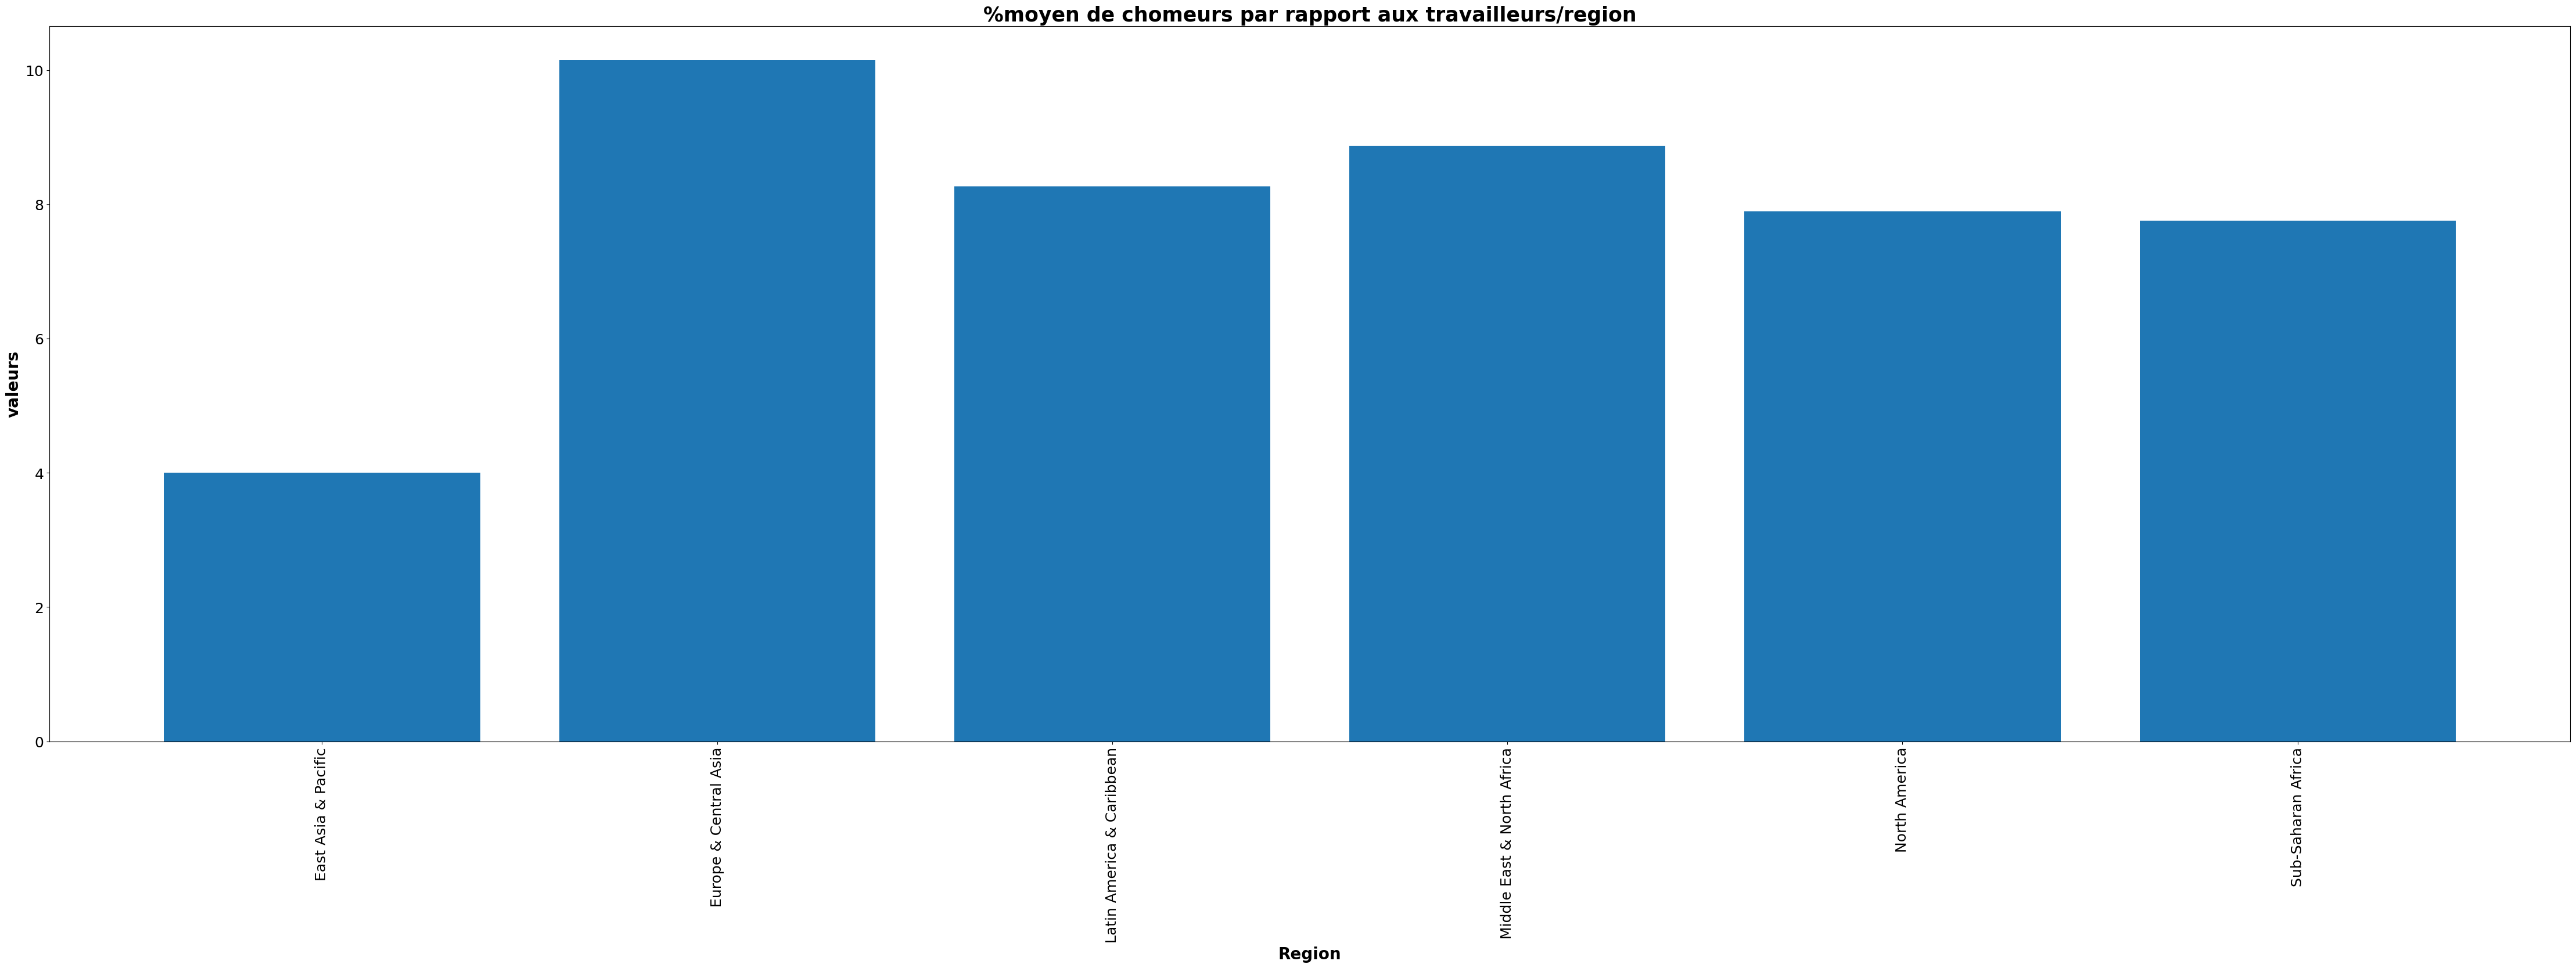

In [1493]:
plt.figure(figsize=(56, 16))
plt.bar(height=Data_Indicator_byRegion['Unemployment, total (% of total labor force)'], x=Data_Indicator_byRegion.index, width=0.8)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Region", fontsize=20, fontweight='bold')
plt.ylabel("valeurs", fontsize=20, fontweight='bold')
plt.title("%moyen de chomeurs par rapport aux travailleurs/region", fontsize=25, fontweight='bold')
plt.show()

Forte demande d'emploi en Europe/Asie centrale et en Afrique :
- Les données révèlent une demande d'emploi particulièrement élevée dans les régions d'Europe et d'Asie centrale, ainsi que sur l'ensemble du continent africain.

Marché potentiel significatif :
- Cette forte demande d'emploi indique l'existence d'une base de clientèle importante pour nos services, offrant ainsi des perspectives d'expansion internationale.

Potentiel africain :
- Ces constatations confirment le potentiel identifié pour le marché africain, en termes de disponibilité de clients potentiels.
Opportunités de reconversion professionnelle :
- Les personnes en recherche d'emploi, et potentiellement en situation de chômage, sont susceptibles de rechercher des opportunités de reconversion professionnelle.
Nos formations en ligne pourraient répondre à ce besoin, en leur offrant des compétences adaptées au marché du travail.

Il serait donc judicieux d'orienter une partie de notre stratégie de developpement vers ces zones geographiques.

D) Zoom sur la région Afrique et Moyen Orient

In [1494]:
Data_Indicator_byCountry['Unemployment, total population'] = (
    Data_Indicator_byCountry['Labor force, total'])*(Data_Indicator_byCountry['Unemployment, total (% of total labor force)'])/100 #On calcule le nombre exacte des sans emploi

Data_Indicator_byCountry['Internet users, total'] = (
    Data_Indicator_byCountry['Population, total'])*(Data_Indicator_byCountry['Internet users (per 100 people)'])/100 #On calcul le nombre exacte d'utilisateurs d'internet

Africa_Middle_West = Data_Indicator_byCountry.loc[ ['Tunisia', 'Morocco', 'Oman', 'West Bank and Gaza', 'Israel', 'Qatar'],  #On regroupe dans le tableau les indicateurs important selon les pays d'Afrique et Moyen orient de notre échantillon
                                                  ['Labor force, total', 'Population, total', 'Unemployment, total population','Population, ages 15-24, total', 'Internet users, total']]
Africa_Middle_West

Indicator Name_x,"Labor force, total","Population, total","Unemployment, total population","Population, ages 15-24, total","Internet users, total"
Country Name,,,,,
Tunisia,3818742.4,10643447.2,5.697564e+05,2039823.4,3.809111e+06
Morocco,11521270.0,32437800.6,1.053044e+06,6367456.2,1.478668e+07
Oman,1424254.2,3077065.6,2.643416e+05,569133.6,1.173148e+06
West Bank and Gaza,927771.8,3816792.0,2.156142e+05,880227.6,1.362350e+06
Israel,3483348.4,7618860.0,2.765779e+05,1125531.0,5.023631e+06
Qatar,1305191.0,1764284.0,5.481802e+03,118247.0,1.075155e+06


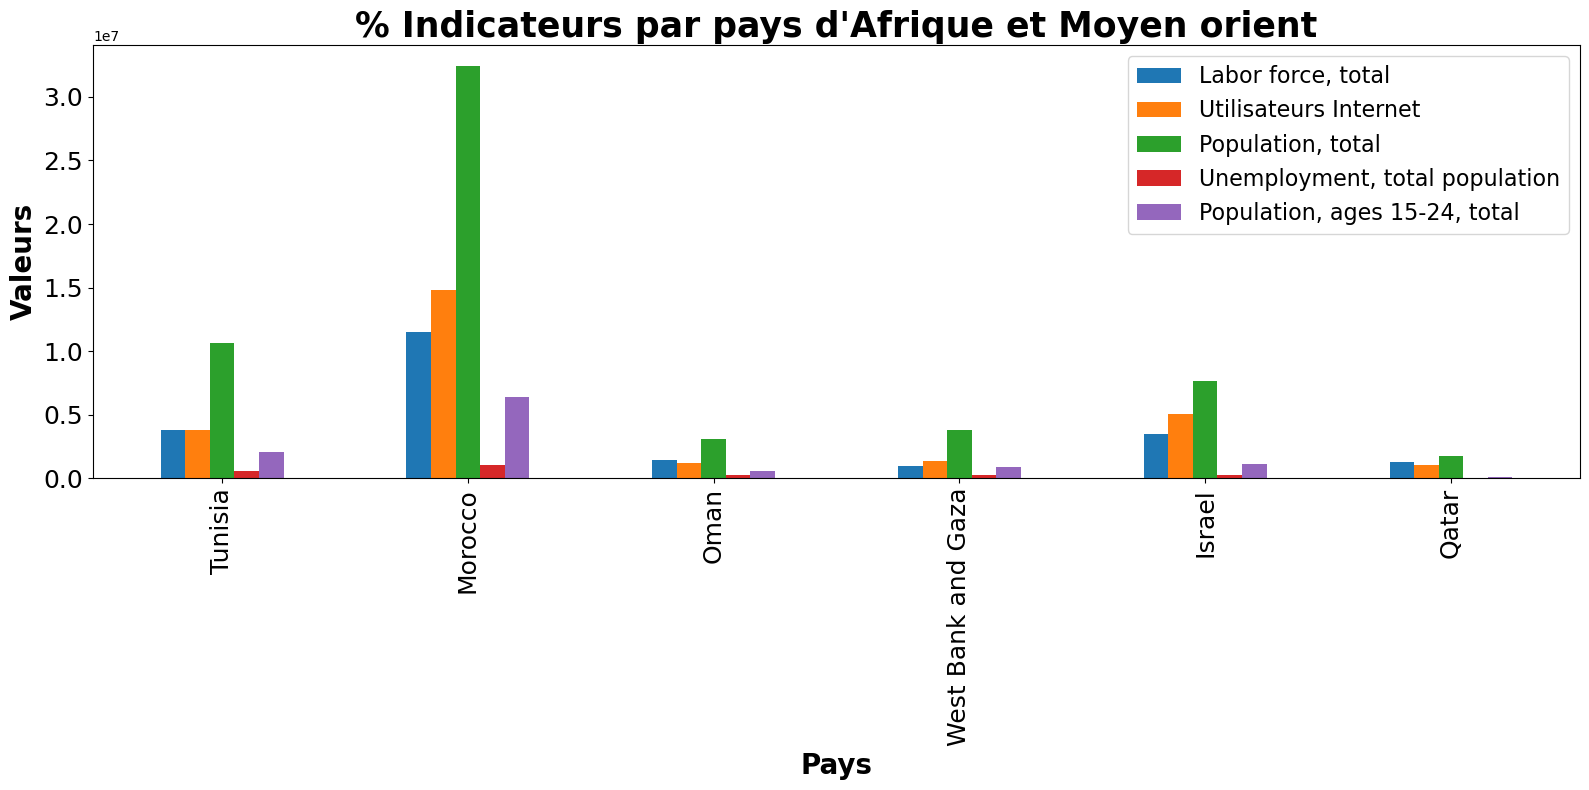

In [1495]:
plt.figure(figsize=(16, 8))

# Définir la largeur des barres
width = 0.1
step=1

# Position des barres sur l'axe x
x = np.arange(len(Africa_Middle_West.index))

# Tracer les barres pour le premier indicateur (Population, total)
plt.bar(x - 2*width, Africa_Middle_West['Labor force, total'], width, label='Labor force, total')

# Tracer les barres pour le deuxième indicateur (Internet users, total)
plt.bar(x - 1*width, Africa_Middle_West['Internet users, total'], width, label='Utilisateurs Internet')

# Tracer les barres pour le deuxième indicateur (Internet users, total)
plt.bar(x , Africa_Middle_West['Population, total'], width, label='Population, total')

# Tracer les barres pour le deuxième indicateur (Internet users, total)
plt.bar(x + 1*width, Africa_Middle_West['Unemployment, total population'], width, label='Unemployment, total population')

# Tracer les barres pour le deuxième indicateur (Internet users, total)
plt.bar(x + 2*width, Africa_Middle_West['Population, ages 15-24, total'], width, label='Population, ages 15-24, total')

# Ajouter les labels et le titre
plt.xticks(x, Africa_Middle_West.index, rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Pays", fontsize=20, fontweight='bold')
plt.ylabel("Valeurs", fontsize=20, fontweight='bold')
plt.title("% Indicateurs par pays d'Afrique et Moyen orient", fontsize=25, fontweight='bold')

# Ajouter la légende
plt.legend(fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

- Ce graphique révèle une forte démographie dans les pays africains ainsi qu'un engagement important dans le monde du travail - un point positif, car plus il y a de travailleurs, plus les besoins en formation augmentent (spécialisation, reconversion, perfectionnement de compétences, etc.).

- Une stratégie possible serait de proposer nos services directement aux entreprises, leur offrant ainsi des solutions de formation à distance à tarifs compétitifs pour leurs employés.

- De plus, tout travailleur développant de nouvelles compétences améliore sa compétitivité sur le marché de l'emploi.


------------
------------

**Conclusion :**

Notre analyse révèle que les marchés les plus prometteurs pour l'exportation de nos formations en ligne se situent en Asie de l'Est (menée par la Chine) grace à leur forte démographie jeune et leur potentiel d'investissement dans l'éducation,  et par l'Amérique du Nord (par les États-Unis) grace à leur potentiel démographique et leur infrastructures, Ces régions constituent des cibles prioritaires pour nos premières initiatives d'expansion internationale.
Ensuite nous pouvons cibler l'Europe de l'ouest (mené par les Pays-bas et la Belgique) grace à son implication élevé dans l'éduction pour les plus jeunes (collège et lycée) en proposant par exemple la performance de nos programmes directement dans les programmes académiques des collèges et lycées, à notter aussi que cette région est caractérisée par une forte demande d'emploi ce qui représente également un potentiel relativement élevé pour notre expension, celà sera matérialisé par les besoins de reconversion professionnelle et des formations de mise à niveau pour ces demandeurs d'emploi. Notre outil représente donc une aubaine pour faciliter l'accès au monde de l'emploi pour cette catégorie. 
Enfin au vu de la forte demande d'emploi, et du potentiel d'infrastructure en forte croissance, l'Afrique(menée par le Maroc et la Tunisie) reste un marché avec un fort potentiel pour le futur, il serait donc prudent de garder un oeil sur cette région et de mettre constement à jour notre étude pour les perspective d'avenir  


#### En résumé : Stratégie d'expansion pour les formations en ligne

Marchés à fort potentiel :
- L'Asie de l'Est (avec la Chine en tête), se distingue par sa forte population jeune et son investissement potentiel dans l'éducation.
- L'Amérique du Nord (en particulier les États-Unis), offre un marché solide grâce à sa démographie et ses infrastructures développées.
Ces deux régions représentent les cibles principales pour les premières phases de notre expansion à l'international.

Marché à développer  :
- L'Europe (mené par les pays bas et la Belgique), présente un intérêt considérable en raison de son fort engagement envers l'éducation, particulièrement les élèves niveau lycée. 
- Proposer nos services pour les établissements scolaires pourrait être une solution d'adaptation à cette demande.
- De plus, le besoin de reconversion professionnelle et de mise à niveau dans cette région offre une opportunité pour nos formations en ligne.

Marché prometteur :
L'Afrique, portée notamment par le Maroc et la Tunisie, affiche un fort potentiel de croissance malgré ses défis actuels. Cette dynamique repose sur plusieurs facteurs :
- Une forte population active dans certains pays comme le Maroc et la Tunisie, ainsi qu’un développement rapide des infrastructures. Les entreprises locales doivent continuellement mettre à jour les compétences de leurs salariés pour rester compétitives sur le marché.
- Une forte demande d'emploi en Afrique subsaharienne, qui constitue une base clientèle prometteuse. Nos formations peuvent répondre à ce besoin en aidant les travailleurs à augmenter leur valeur sur le marché de l’emploi.

Un suivi constant de ce marché est essentiel pour identifier les opportunités futures et adapter notre offre en conséquence.

En résumé :

Notre stratégie d'expansion internationale se concentrera d'abord sur l'Asie de l'Est et l'Amérique du Nord, tout en explorant les opportunités offertes par l'Europe centrale et en surveillant attentivement la progression du marché africain.